In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # for the subplots

import pandas as pd
import seaborn as sns

# PCA Using Eigendecomposition and SVD
The  purpose  of  PCA  is  to  find  a  set  of  basis  vectors  for  a  dataset  that  point  in  the direction that maximizes covariation across the variables.<br>
Imagine  that  an  N-D  dataset  exists  in  an  N-D  space,  with  each  data  point  being  a coordinate  in  that  space.  This  is  sensible  when  you  think  about  storing  the  data  in  a matrix with N observations (each row is an observation) of M features (each column is a feature, also called variable or measurement); the data live in $ℝ^M$ and comprise N vectors or coordinates.<br>
An  example  in  2D  is  shown  in  Figure  15-1.  The  left-side  panel  shows  the  data  in  its original data space, in which each variable provides a basis vector for the data. Clearly the  two  variables  (the  x-  and  y-axes)  are  related  to  each  other,  and  clearly  there  is  a direction in the data that captures that relation better than either of the feature basis vectors.<br>
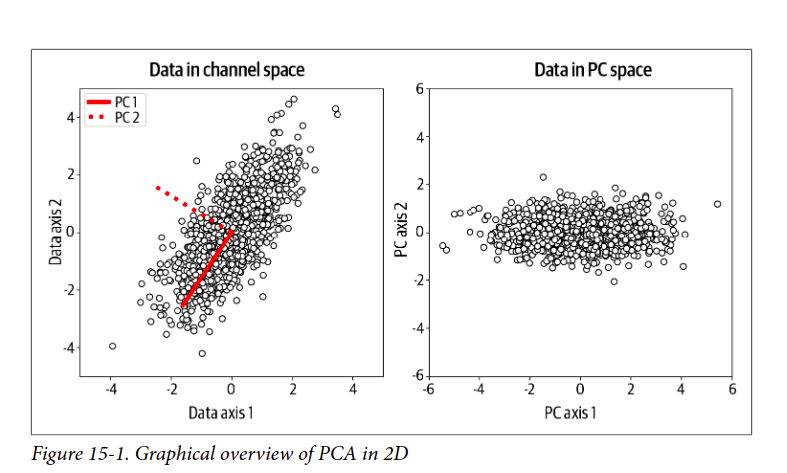<br>
The goal of PCA is to find a new set of basis vectors such that the linear relationships across  the  variables  are  maximally  aligned  with  the  basis  vectors—that’s  what  the right-side  panel  of  Figure  15-1  shows.  Importantly,  PCA  has  the  constraint  that the  new  basis  vectors  are  orthogonal  rotations  of  the  original  basis  vectors.

# The Math of PCA
PCA  combines  the  statistical  concept  of  variance  with  the  linear  algebra  concept  of linear weighted combination. Variance, as you know, is a measure of the dispersion of a dataset around its average value. PCA makes the assumption that variance is good,and  directions  in  the  data  space  that  have  more  variance  are  more  important  (a.k.a.“variance = relevance”).<br>
But in PCA, we’re not just interested in the variance within one variable; instead, we want to find the linear weighted combination across all variables that maximizes variance of that component (a component is a linear weighted combination of variables).<br>
Let’s  write  this  down  in  math.  Matrix  X  is  our  data  matrix  (a  tall  full  column-rank matrix of observations by features), and w is the vector of weights. Our goal in PCA is  to  find  the  set  of  weights  in  w  such  that  Xw  has  maximal  variance.  Variance  is  a scalar, so we can write that down as:<br>
$$ \lambda = || X w||^2$$<br>
The  squared  vector  norm  is  actually  the  same  thing  as  variance  when  the  data  is mean-centered (that is, each data variable has a mean of zero); I’ve omitted a scaling factor of 1/(N − 1), because it does not affect the solution to our optimization goal.<br>
The  problem  with  that  equation  is  you  can  simply  set  w  to  be  HUGE  numbers;  the bigger  the  weights,  the  larger  the  variance.  The  solution  is  to  scale  the  norm  of  the weighted combination of data variables by the norm of the weights:<br>
$$ \lambda =  \frac{|| X w||^2}{|| w ||^2}$$<br>
Now  we  have  a  ratio  of  two  vector  norms.  We  can  expand  those  norms  into  dot products to gain some insight into the equation:<br>
$$ \lambda = \frac{w^TX^TXw}{w^Tw}$$
$$ C = X^TX$$
$$ \lambda = \frac{w^TCW}{w^Tw}$$<br>
We’ve now discovered that the solution to PCA is the same as the solution to finding the  directional  vector  that  maximizes  the  normalized  quadratic  form  (the  vector norm is the normalization term) of the data covariance matrix.<br>
<b> But how do we actually find the elements in vector w that maximize λ?</b><br>
The  linear  algebra  approach  here  is  to  consider  not  just  a  single  vector  solution  but an  entire  set  of  solutions.  Thus,  we  rewrite  the  equation  using  matrix  W  instead  of vector w. That would give a matrix in the denominator, which is not a valid operation in linear algebra; therefore, we multiply by the inverse:<br>
$$ Λ = (W^TW)^{-1}W^TCW$$<br>
From here, we apply some algebra and see what happens:
$$ Λ = (W^TW)^{-1}W^TCW$$
$$ Λ = W^{-1}W^{-T}W^TCW$$
$$ Λ = W^{-1}CW$$
$$ WΛ = CW$$<br>
Remarkably, we’ve discovered that the solution to PCA is to perform an eigendecomposition on the data covariance matrix. The eigenvectors are the weights for the data variables,  and  their  corresponding  eigenvalues  are  the  variances  of  the  data  along each direction (each column of W).<br>
Because covariance matrices are symmetric, their eigenvectors and therefore principal  components are  orthogonal.  This  has  important  implications  for  the  appropriateness of PCA for data analysis.<br>


# PCA Proof
The  proof  that  eigendecomposition  solves  the  PCA  optimization  goal.  If  you  are  not  familiar  with  calculus  and  Lagrange  multipliers,  then  please feel free to skip this; I include it here in the interest of completeness, not because you need to understand it to solve the exercises or use PCA in practice.<br>
Our  goal  is  to  maximize  $w^TCw$  subject  to  the  constraint  that  $w^Tw= 1$.  We  can express this optimization using a Lagrange multiplier:<br>
$$ L(w, \lambda) = w^TCw - \lambda(w^Tw -1)$$
$$ 0 = \frac{d}{dw}(w^TCw - \lambda(w^Tw -1))$$
$$ 0 = Cw - \lambda w$$
$$ Cw = \lambda w$$<br>
Briefly,  the  idea  is  that  we  use  the  Lagrange  multiplier  to  balance  the  optimization with  the  constraint,  take  the  derivative  with  respect  to  the  weights  vector,  set  the derivative to zero, differentiate with respect to w, and discover that w is an eigenvector of the covariance matrix.

# The Steps to Perform a PCA
With the math out of the way, here are the steps to implement a PCA:
1. Compute the covariance matrix of the data. The resulting covariance matrix will be features-by-features. Each feature in the data must be mean-centered prior to computing covariance.
2. Take the eigendecomposition of that covariance matrix.
3. Sort the eigenvalues descending by magnitude, and sort the eigenvectors accordingly. Eigenvalues of the PCA are sometimes called latent factor scores.
4. Compute  the  “component  scores”  as  the  weighted  combination  of  all  data  features,  where  the  eigenvector  provides  the  weights.  The  eigenvector  associated with the largest eigenvalue is the “most important” component, meaning the one with the largest variance.
5. Convert the eigenvalues to percent variance explained to facilitate interpretation.

# PCA via SVD
PCA  can  equivalently  be  performed  via  eigendecomposition  as  previously  describedor via SVD. There are two ways to perform a PCA using SVD:
1. Take the SVD of the covariance matrix. The procedure is identical to that previously described, because SVD and eigendecomposition are the same decomposition for covariance matrices.
2. Take  the  SVD  of  the  data  matrix  directly.  In  this  case,  the  right  singular  vectors  (matrix  V)  are  equivalent  to  the  eigenvectors  of  the  covariance  matrix(it  would  be  the  left  singular  vectors  if  the  data  matrix  is  stored  as  features-by-observations).  The  data  must  be  mean-centered  before  computing  the  SVD. The  square  root  of  the  singular  values  is  equivalent  to  the  eigenvalues  of  the covariance matrix.
<br>
<b>Should  you  use  eigendecomposition  or  SVD  to  perform  a  PCA?</b>  You  might  think that  SVD  is  easier  because  it  does  not  require  the  covariance  matrix.  That’s  true for  relatively  small  and  clean  datasets.  But  larger  or  more  complicated  datasets  may require  data  selection  or  may  be  too  memory  intensive  to  take  the  SVD  of  the entire data matrix. In these cases, computing the covariance matrix first can increase analysis flexibility. But the choice of eigendecomposition versus SVD is often a matter of personal preference.<br>

# Linear Discriminant Analysis
Linear  discriminant  analysis  (LDA)  is  a  multivariate  classification  technique  that  is often  used  in  machine  learning  and  statistics. The  goal  of  LDA  is  to  find  a  direction  in  the  data  space  that  maximally  separates categories  of  data.  An  example  problem  dataset  is  shown  in  graph  A  in  Figure  15-2. It is visually obvious that the two categories are separable, but they are not separable on either of the data axes alone—that is clear from visual inspection of the marginal distributions.<br>
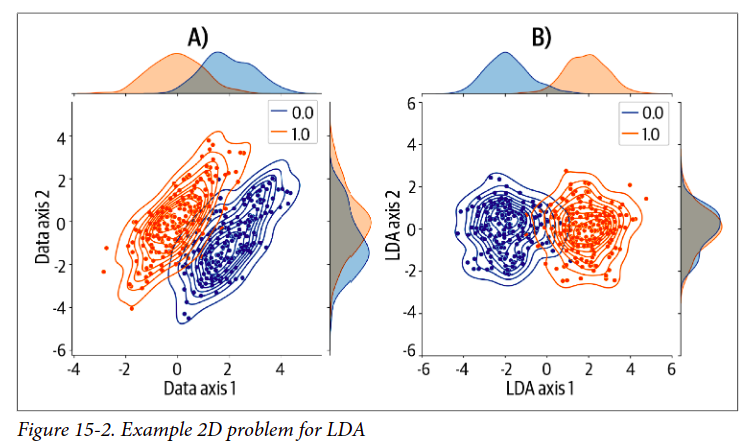<br>
Enter  LDA.  LDA  will  find  basis  vectors  in  the  data  space  that  maximally  separate the  two  categories.  Graph  B  in  Figure  15-2  shows  the  same  data  but  in  the  LDA space.  Now  the  classification  is  simple—observations  with  negative  values  on  axis-1 are  labeled  category  “0”  and  any  observations  with  positive  values  on  axis  1  are labeled category “1.” The data is completely inseparable on axis 2, indicating that one dimension is sufficient for accurate categorization in this dataset.<br>
<b>How  does  such  a  marvel  of  mathematics  work?</b>  It’s  actually fairly  straightforward  and  based  on  generalized  eigendecomposition.<br>
The goal  is  to  find  a  set  of  weights  such that  the  weighted  combination  of  variables  maximally  separates  the  categories.  That objective function can be written similarly as with the PCA objective function:<br>
$$ \lambda = \frac{||X_B w||^2}{||X_W w||^2} $$<br>
In English: we want to find a set of feature weights w that maximizes the ratio of the variance of data feature $X_B$, to the variance of data feature $X_W$. Notice that the same weights are applied to all data observations.<br>
The linear algebra solution comes from following a similar argument as described in the PCA section. First, expand $∥X_Bw∥^2$ to $w^TX_B^TX_Bw$ and express this as $w^TC_Bw$; second, consider a set of solutions instead of one solution; third, replace the division with the multiplication of the inverse; and finally, do some algebra and see what happens:<br>
$$ Λ = (W^TC_WW)^{-1} W^TC_BW$$
$$ Λ = W^{−1}C_W^{−1}W^{−T}W^TC_BW$$
$$ Λ = W^{−1}C_W^{−1}C_BW$$
$$ WΛ = C_W^{−1}C_BW$$
$$ C_WWΛ = C_BW$$<br>
In  other  words,  the  solution  to  LDA  comes  from  a  generalized  eigendecomposition on  two  covariance  matrices.  The  eigenvectors  are  the  weights,  and  the  generalized eigenvalues are the variance ratios of each component.<br>
<b>With the math out of the way, which data features are used to construct $X_B$ and $X_W$?</b><br>
Well, there are different ways of implementing that formula, depending on the nature of  the  problem  and  the  specific  goal  of  the  analysis.  But  in  a  typical  LDA  model, the  $X_B$  comes  from  the  between-category  covariance  while  the  $X_W$  comes  from  the within-category covariance.<br>
The  within-category  covariance  is  simply  the  average  of  the  covariances  of  the  data samples  within  each  class.  The  between-category  covariance  comes  from  creating a  new  data  matrix  comprising  the  feature  averages  within  each  class. If  you  are  familiar  with  statistics,  then you’ll  recognize  this  formulation  as  analogous  to  the  ratio  of  between-group  to within-group sum of squared errors in ANOVA models.<br>
Two  final  comments:  The  eigenvectors  of  a  generalized  eigendecomposition  are  not constrained  to  be  orthogonal.  That’s  because  $C_W^{−1}C_B$  is  generally  not  a  symmetric matrix even though the two covariance matrices are themselves symmetric. Nonsymmetric  matrices  do  not  have  the  orthogonal eigenvector  constraint.<br>
Finally,  LDA  will  always  find  a  linear  solution  (duh,  that’s  right  in  the  name  LDA), even if the data is not linearly separable. Nonlinear separation would require a transformation  of  the  data  or  the  use  of  a  nonlinear  categorization  method  like  artificial neural networks. LDA will still work in the sense of producing a result; it’s up to you as the data scientist to determine whether that result is appropriate and interpretable for a given problem.<br>

# Low-Rank Approximations via SVD
The  idea  is  to  take  the  SVD  of  a  data  matrix  or  image,  and  then reconstruct that data matrix using some subset of SVD components.<br>
You  can  achieve  this  by  setting  selected  σs  to  equal  zero  or  by  creating  new  SVD matrices  that  are  rectangular,  with  the  to-be-rejected  vectors  and  singular  values removed.  This  second  approach  is  preferred  because  it  reduces  the  sizes  of  the  data to  be  stored,  as  you  will  see  in  the  exercises.  In  this  way,  the  SVD  can  be  used  to compress data down to a smaller size.

# SVD for Denoising
Denoising  via  SVD  is  simply  an  application  of  low-rank  approximation.  The  only difference  is  that  SVD  components  are  selected  for  exclusion  based  on  them  representing noise as opposed to making small contributions to the data matrix.<br>
The  to-be-removed  components  might  be    layers  associated  with  the  smallest  singular values—that would be the case for low-amplitude noise associated with small equipment imperfections. But larger sources of noise that have a stronger impact on the data might have  larger  singular  values.  These  noise  components  can  be    identified  by  an  algorithm based  on  their  characteristics  or    by  visual  inspection.

# Code Exercises

### Question 15-1. Before  performing  a  PCA,  import  and  inspect  the  data (https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx).
### Now  for  the  PCA.  Implement  the  PCA  using  the  five  steps  outlined  earlier  in  this chapter.  Visualize  the  results  as  in  Figure  15-4.  Use  code  to  demonstrate  several features of PCA:<br>1. The variance of the component time series (using np.var) equals the eigenvalue associated with that component.<br>2. The  correlation  between  principal  components  (that  is,  the  weighted  combinations of the stock exchanges) 1 and 2 is zero, i.e., orthogonal.<br>3.Visualize the eigenvector weights for the first two components. The weights show3.how much each variable contributes to the component.<br>
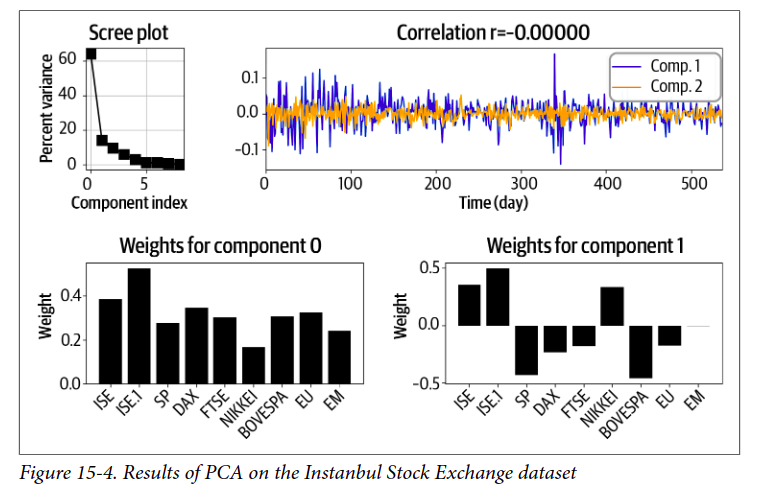

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"
data = pd.read_excel(url,index_col=0,skiprows=1)

# let's have a look
data.head(10)

/home/aditya/env/gpt/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   
2009-01-12 -0.029191 -0.042361 -0.022823 -0.013526 -0.005026 -0.049039   
2009-01-13  0.015445 -0.000272  0.001757 -0.017674 -0.006141  0.000000   
2009-01-14 -0.041168 -0.035552 -0.034032 -0.047383 -0.050945  0.002912   
2009-01-15  0.000662 -0.017268  0.001328 -0.019551 -0.014335 -0.050448   
2009-01-16  0.022037  0.032278  0.007533  0.006791  0.006289  0.025453   

             BOVESPA        EU        EM  
date                                      
2009-01-05  0.031190  0.012698  0.028524  
2009-01-06  0.018920  0.011341  0.008773  
2009-01-07 -0.035899 -0.017073 -0.020015  
2009-01-08  0.028283 -0.005561 -0.019424  
2009-01-09 -0.009764 -0.010989 -0.007802  
2009-01-12 -0.053849 -0.012451 -0.022630  
2009-01-13  0.003572 -0.012220 -0.004827  
2009-01-14 -0.040302 -0.045220 -0.008677  
2009-01-15  0.030314 -0.012070 -0.023429  
2009-01-16  0.004867  0.008561  0.010917

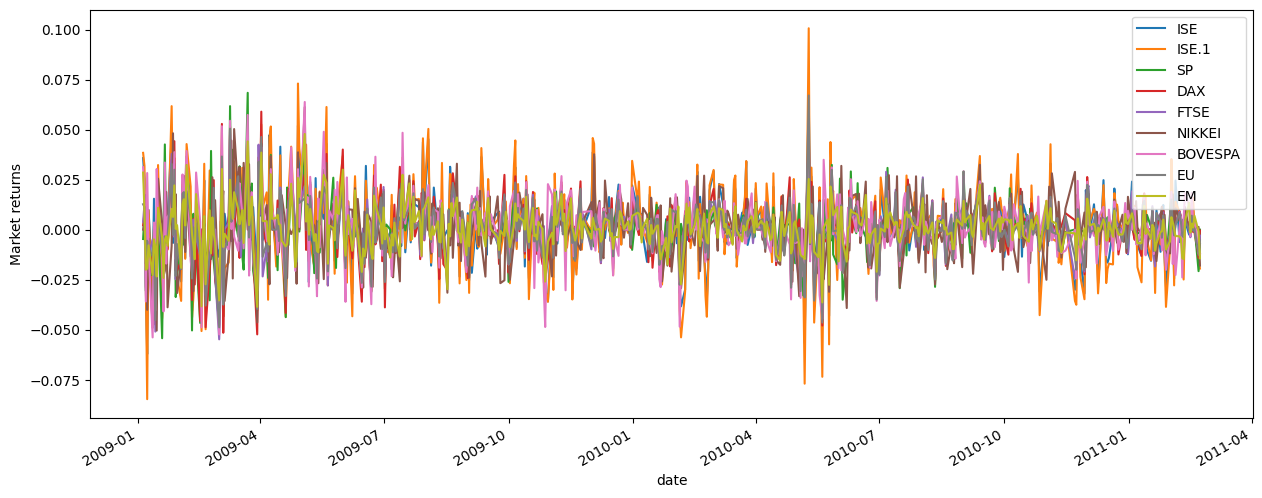

In [3]:
# show some data in line plots
data.plot(figsize=(15,6),ylabel='Market returns')
plt.show()

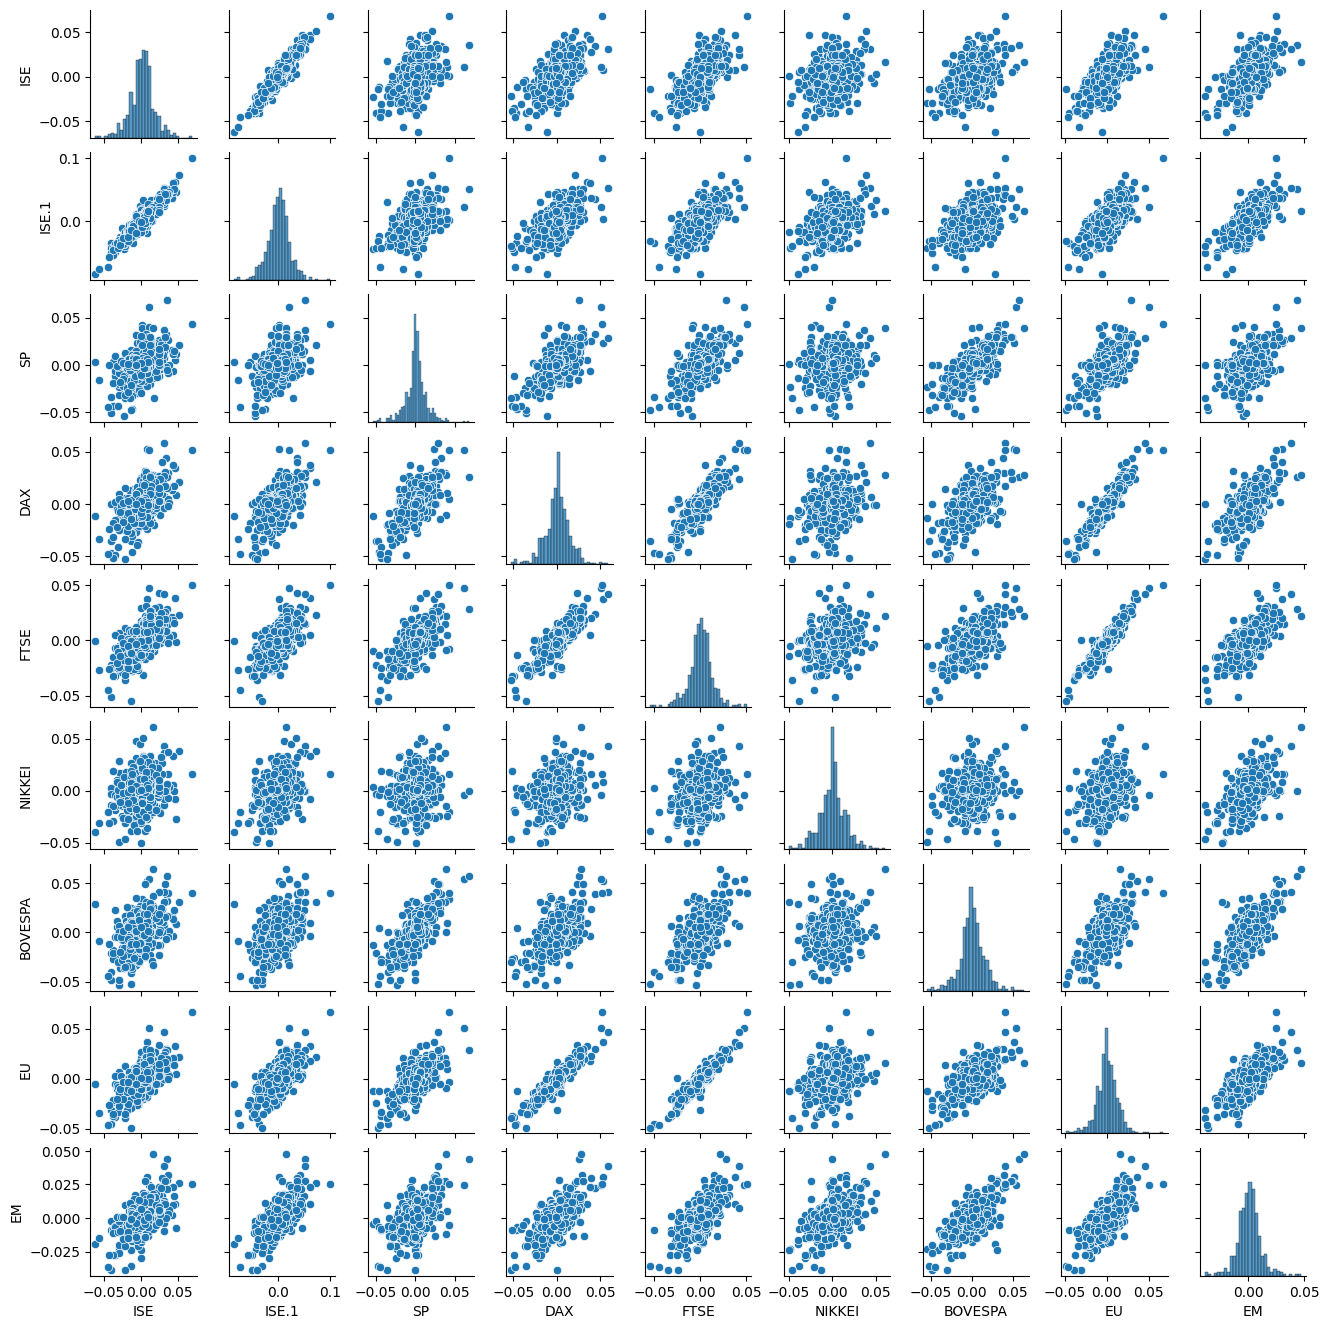

In [4]:
sns.pairplot(data,height=1.5)
plt.show()

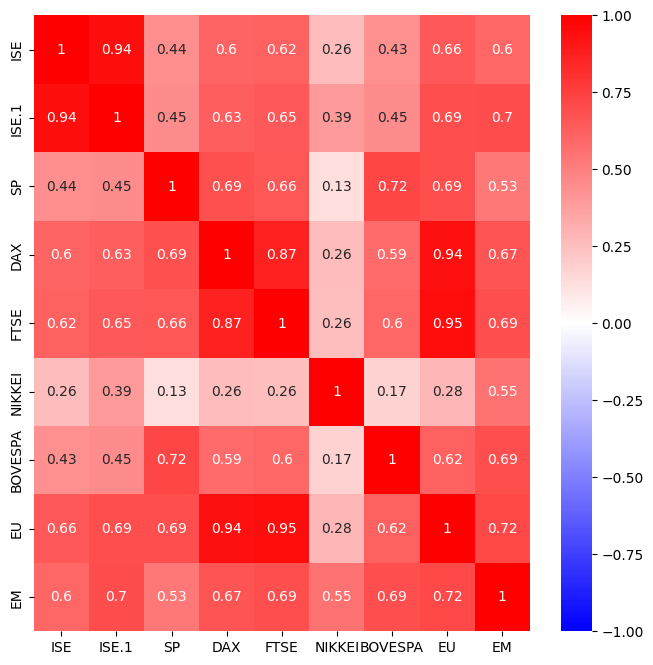

In [5]:
#correaltion
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap='bwr')
plt.show()

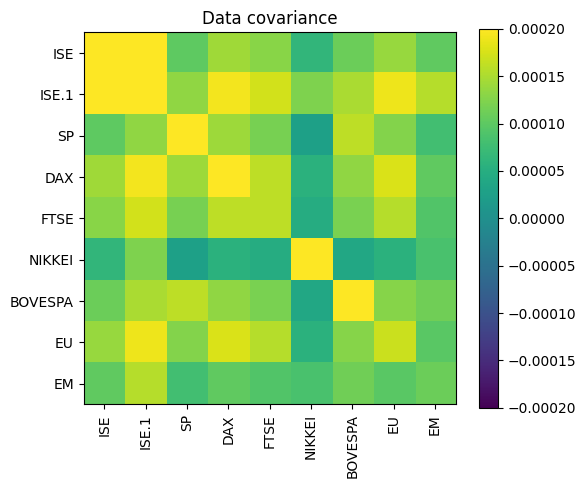

In [6]:
# PCA
# Step 1: covariance matrix
X = data.values # extract data
X = X - np.mean(X,axis=0,keepdims=True) # mean-center via broadcasting

# note: these data are observations-by-features, so we need X'X, not XX'
covmat = X.T@X / (X.shape[0]-1)

# visualize it
plt.figure(figsize=(6,6))
plt.imshow(covmat,vmin=-.0002,vmax=.0002)
plt.colorbar(shrink=.82)
plt.title('Data covariance')
plt.xticks(range(X.shape[1]),labels=data.columns,rotation=90)
plt.yticks(range(X.shape[1]),labels=data.columns)
plt.show()

(536, 2)


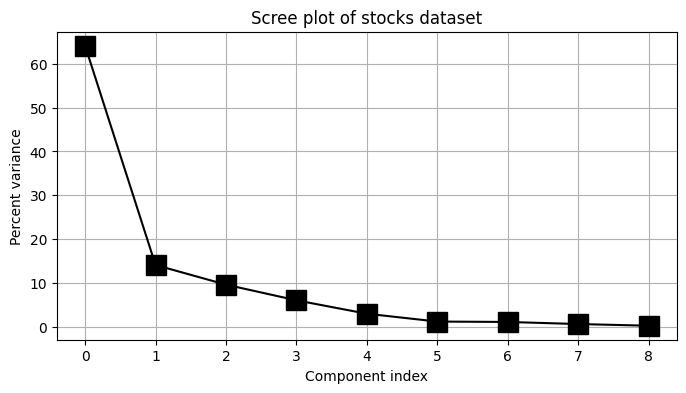

In [7]:
# Step 2: eigendecomposition
evals,evecs = np.linalg.eig(covmat)

# Step 3: sort results
sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]


# Step 4: component scores
components = data.values @ evecs[:,0:2]
print(components.shape)

# Step 5: eigenvalues to %var
factorScores = 100*evals/np.sum(evals)


# show scree plot
plt.figure(figsize=(8,4))
plt.plot(factorScores,'ks-',markersize=15)
plt.xlabel('Component index')
plt.ylabel('Percent variance')
plt.title('Scree plot of stocks dataset')
plt.grid()
plt.show()

In [8]:
# Show that variance of the components equals the eigenvalue
print('Variance of first two components:')
print(np.var(components,axis=0,ddof=1)) # note the ddof=1! The default produces the biased variance.

print(f'\nFirst two eigenvalues:')
print(evals[:2])

Variance of first two components:
[0.0013006  0.00028585]

First two eigenvalues:
[0.0013006  0.00028585]


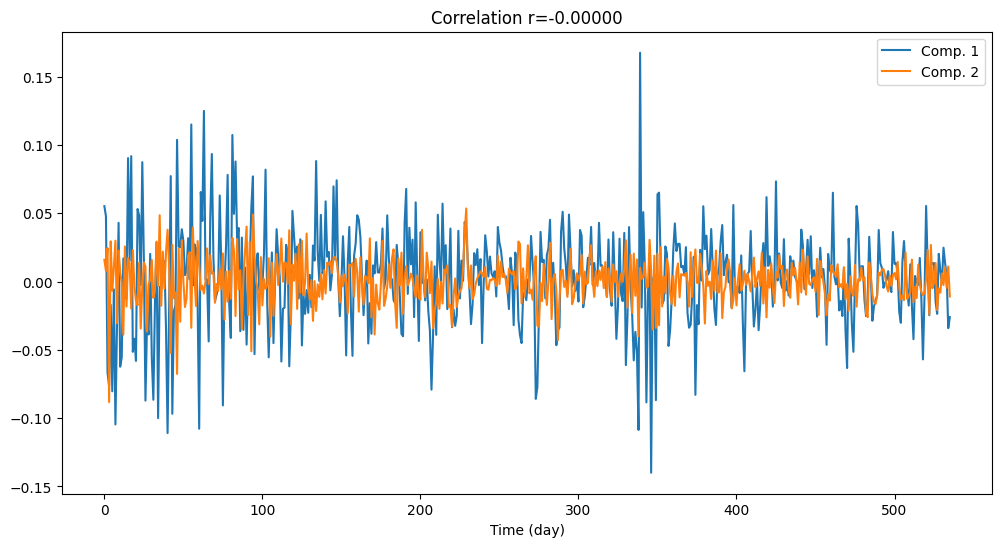

In [9]:
# correlate first two components

plt.figure(figsize=(12,6))
plt.plot(components)
plt.xlabel('Time (day)')
plt.legend(['Comp. 1','Comp. 2'])
plt.title(f'Correlation r={np.corrcoef(components.T)[0,1]:.5f}')
plt.show()

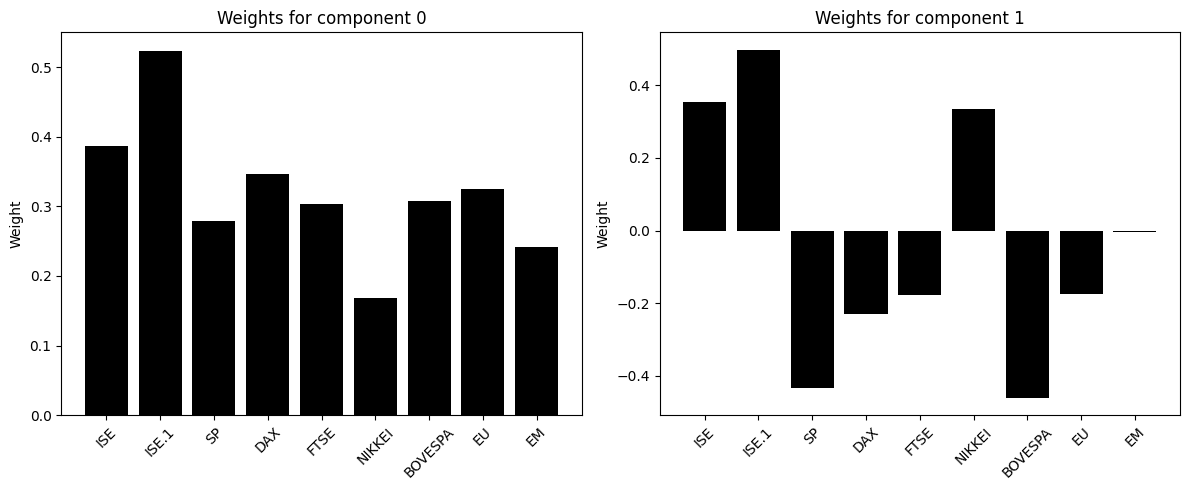

In [10]:
_,axs = plt.subplots(1,2,figsize=(12,5))

for i in range(2):
  axs[i].bar(range(X.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(X.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('Weight')
  axs[i].set_title(f'Weights for component {i}')

plt.tight_layout()
plt.show()

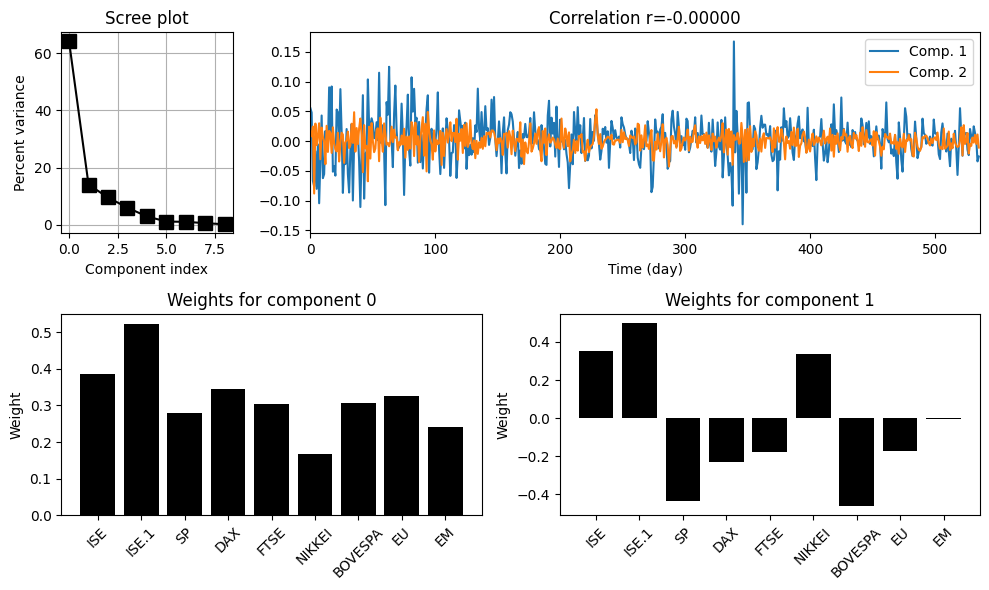

In [11]:
# Now all in one figure

fig = plt.figure(figsize=(10,6))
gs = GridSpec(2,4,figure=fig)

# scree plot
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(factorScores,'ks-',markersize=10)
ax1.set_xlabel('Component index')
ax1.set_ylabel('Percent variance')
ax1.set_title('Scree plot')
ax1.grid()


# component time series
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(components)
ax2.set_xlabel('Time (day)')
ax2.set_xlim([0,components.shape[0]])
ax2.legend(['Comp. 1','Comp. 2'])
ax2.set_title(f'Correlation r={np.corrcoef(components.T)[0,1]:.5f}')


# bar plots of component loadings
axs = fig.add_subplot(gs[1,:2]), fig.add_subplot(gs[1,2:])
for i in range(2):
  axs[i].bar(range(X.shape[1]),evecs[:,i],color='black')
  axs[i].set_xticks(range(X.shape[1]))
  axs[i].set_xticklabels(data.columns,rotation=45)
  axs[i].set_ylabel('Weight')
  axs[i].set_title(f'Weights for component {i}')


plt.tight_layout()
plt.show()
     

# Discussion:-
The  scree  plot  strongly  suggests  that  the  international  stock  exchanges are driven by a common factor of the global economy: there is one large component that accounts for around 64% of the variance in the data, while the other components each account for less than 15% of the variance (in a purely random dataset we would expect  each  component  to  account  for  100/9  =  11%  of  the  variance,  plus/minus noise).<br>A rigorous evaluation of the statistical significance of these components is outside the scope of this book, but based on visual inspection of the scree plot, we are not really justified  to  interpret  the  components  after  the  first  one;  it  appears  that  most  of  the variance in this dataset fits neatly into one dimension.<br>From the perspective of dimensionality reduction, we could reduce the entire dataset to  the  component  associated  with  the  largest  eigenvalue  (this  is  often  called  the  top component),  thereby  representing  this  9D  dataset  using  a  1D  vector.  Of  course,  we lose information, 36% of the information in the dataset is removed if we focus only on  the  top  component but  hopefully,  the  important  features  of  the  signal  are  in the  top  component  while  the  less  important  features,  including  random  noise,  are ignored.

### Question 15-2.Reproduce  the  results  using  (1)  the  SVD  of  the  data  covariance  matrix  and  (2)  the SVD of the data matrix itself. Remember that the eigenvalues of $X^TX$ are the squared singular values of X; furthermore, the scaling factor on the covariance matrix must be applied to the singular values to find equivaluence.

In [12]:
### SVD on covariance matrix

# SVD
U,s,Vt = np.linalg.svd(covmat)

# eigen/singular values
print('First 4 eigenvalues:')
print(evals[:4])

print(f'\nFirst 4 singular values:')
print(s[:4])


# eigen/singular vectors
print('\n\n\nFirst eigenvector:')
print(evecs[:,0])

print('\nFirst singular vector:')
print(U[:,0])

First 4 eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]

First 4 singular values:
[0.0013006  0.00028585 0.00019503 0.00012253]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First singular vector:
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


In [13]:
### SVD on data matrix

# Note that the data variable X is already mean-centered!
U,s,Vt = np.linalg.svd(X)  # SVD


# eigen/singular values
print('First 4 eigenvalues:')
print(evals[:4])

print(f'\nFirst 4 singular values:')
print(s[:4]**2/(X.shape[0]-1))


# eigen/singular vectors
print('\n\n\nFirst eigenvector:')
print(evecs[:,0])

print('\nFirst right singular vector:')
print(Vt[0,:])

First 4 eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]

First 4 singular values:
[0.0013006  0.00028585 0.00019503 0.00012253]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First right singular vector:
[-0.3864847  -0.52390953 -0.27860507 -0.34621538 -0.30322542 -0.16781756
 -0.30741897 -0.32544121 -0.24111348]


### Question 15-3. Compare  your  “manual”  PCA  with  the  output  of  Python’s  PCA  routine.  You’ll  have to do some online research to figure out how to run a PCA in Python (this is one of the most important skills in Python programming!), but I’ll give you a hint: it’s in the sklearn.decomposition library.

In [14]:
### As above, it suffices to show that the eigenvalues and eigenvectors match.

from sklearn.decomposition import PCA
 
pca = PCA()
X_t = pca.fit_transform(data)

# compare percent-normalized eigenvalues
print('Eigenvalues:')
print(evals[:4])

print(f'\nExplained variance from sklearn:')
print(pca.explained_variance_[:4])



# eigenvector and sklearn component
print('\n\n\nFirst eigenvector:')
print(evecs[:,0])

print('\nFirst sklearn component vector:')
print(pca.components_[0,:])

Eigenvalues:
[0.0013006  0.00028585 0.00019503 0.00012253]

Explained variance from sklearn:
[0.0013006  0.00028585 0.00019503 0.00012253]



First eigenvector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]

First sklearn component vector:
[0.3864847  0.52390953 0.27860507 0.34621538 0.30322542 0.16781756
 0.30741897 0.32544121 0.24111348]


### Question 15-4. Now  you  will  perform  a  PCA  on  simulated  data,  which  will  highlight  one  of  the potential limitations of PCA. The goal is to create a dataset comprising two “streams” of data and plot the principal components on top, like in Figure 15-5.
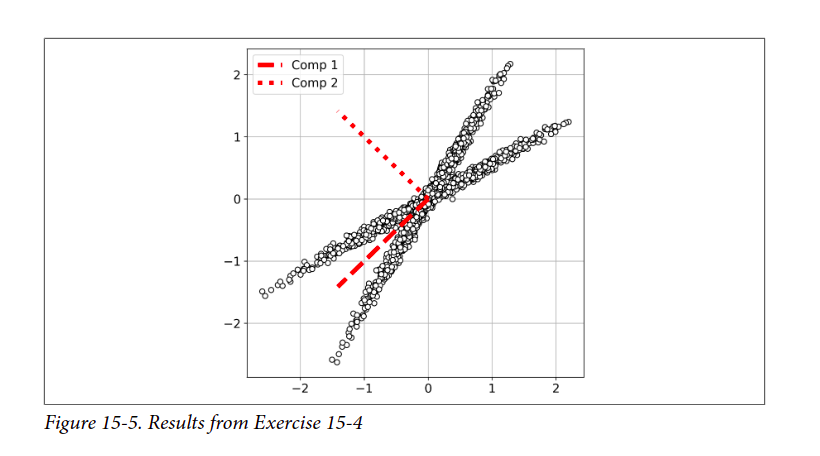<br>
### Here’s how to create the data:<br>1.Create a 1,000 × 2 matrix of random numbers drawn from a normal (Gaussian) distribution in which the second column is scaled down by .05.<br>2.Create a 2 × 2 pure rotation matrix (see Chapter 7).<br>3.Stack  two  copies  of  the  data  vertically:  once  with  the  data  rotated  by  θ  =  −π/6, and once with the data rotated by θ = −π/3. The resulting data matrix will be of size 2,000 × 2.<br>Use  SVD  to  implement  the  PCA.  I  scaled  the  singular  vectors  by  a  factor  of  2  for visual inspection.

In [15]:
# generate data

x = np.hstack((np.random.randn(1000,1),.05*np.random.randn(1000,1)))

# rotation matrices
th = -np.pi/6
R1 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])
th = -np.pi/3
R2 = np.array([ [np.cos(th), -np.sin(th)],
                [np.sin(th),  np.cos(th)] ])

# create the data
X = np.vstack((x@R1,x@R2))
X.shape

(2000, 2)

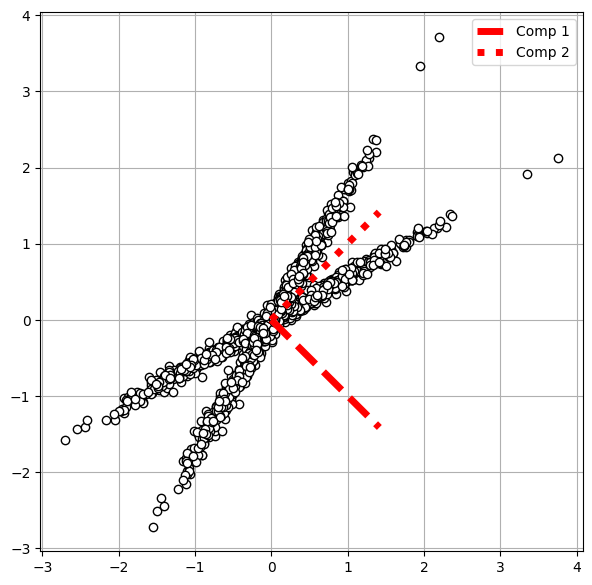

In [16]:
# PCA via SVD
U,s,Vt = np.linalg.svd(X-np.mean(X,axis=0,keepdims=True))

# not necessary: convert singular values into eigenvalues
s = s**2 / (X.shape[0]-1)

# also not necessary: up-scale the singular vectors for visualization
Vt *= 2
# plot the data and eigenvectors

plt.figure(figsize=(7,7))

# the data
plt.plot(X[:,0],X[:,1],'ko',markerfacecolor='w')

# eigenvectors
plt.plot([0,Vt[0,0]],[0,Vt[1,0]],'r--',linewidth=5,label='Comp 1')
plt.plot([0,Vt[0,1]],[0,Vt[1,1]],'r:',linewidth=5,label='Comp 2')

plt.legend()
plt.grid()
plt.show()

# Discussion
PCA  is  excellent  for  reducing  dimensionality  of  a  high-dimensional dataset.  This  can  facilitate  data  compression,  data  cleaning,  and  numerical  stability issues  (e.g.,  imagine  that  a  200-dimensional  dataset  with  a  condition  number  of  1010 is  reduced  to  the  largest  100  dimensions  with  a  condition  number  of  105).  But  the dimensions  themselves  may  be  poor  choices  for  feature  extraction,  because  of  the orthogonality  constraint.  Indeed,  the  principal  directions  of  variance  in  Figure  15-5 are  correct  in  a  mathematical  sense,  but  I’m  sure  you  have  the  feeling  that  those  are not the best basis vectors to capture the features of the data.

### Question 15-5. You  are  going  to  perform  an  LDA  on  simulated  2D  data.  Simulated  data  is  advantageous  because  you  can  manipulate  the  effects  sizes,  amount  and  nature  of  noise,number of categories, and so on.<br>The  data  you  will  create  was  shown  in  Figure  15-2.  Create  two  sets  of  normally distributed  random  numbers,  each  of  size  200 × 2,  with  the  second  dimension  being added  onto  the  first  (this  imposes  a  correlation  between  the  variables).  Then  add  an xy offset of [2 −1] to the first set of numbers. It will be convenient to create a 400 × 2 matrix that contains both data classes, as well as a 400-element vector of class labels (I used 0s for the first class and 1s for the second class).<br>Use sns.jointplot and plot_joint to reproduce graph A in Figure 15-2.
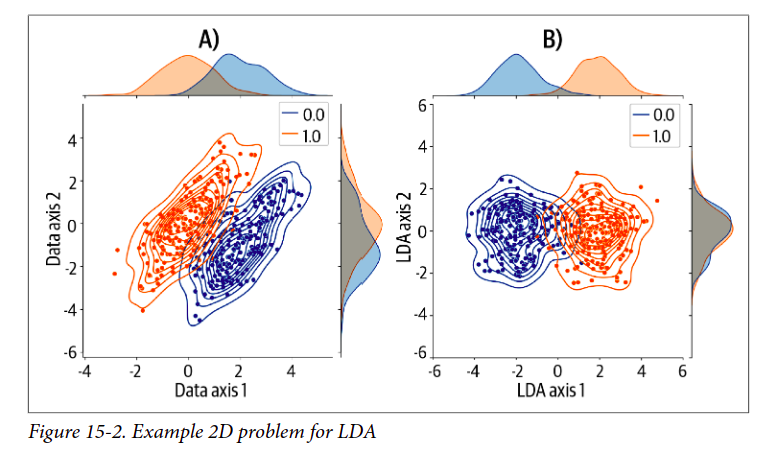

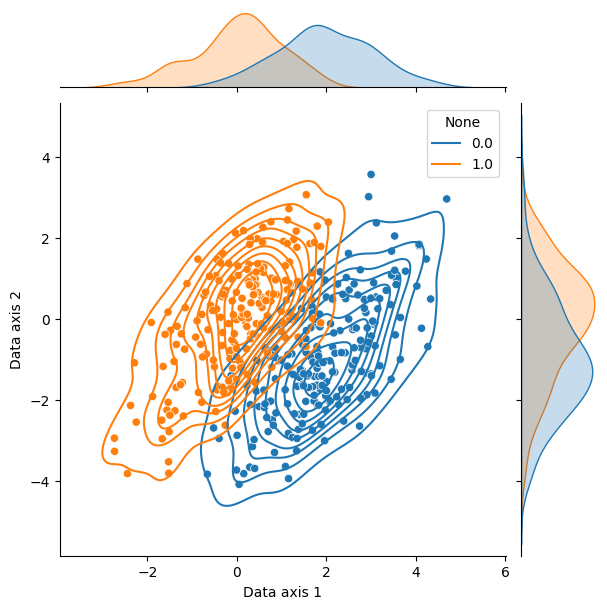

In [17]:
# create the data
N = 200

class1 = np.random.randn(N,2)
class1[:,1] += class1[:,0]
class1 += np.array([2,-1])

class2 = np.random.randn(N,2)
class2[:,1] += class2[:,0]

# for later, it will be convenient to have the data in one matrix
alldata = np.vstack((class1,class2))
labels  = np.append(np.zeros(N),np.ones(N))



# show data in their original data space
ax = sns.jointplot(x=alldata[:,0],y=alldata[:,1],hue=labels)
ax.ax_joint.set_xlabel('Data axis 1')
ax.ax_joint.set_ylabel('Data axis 2')
ax.plot_joint(sns.kdeplot)
plt.show()

### Question 15-6. Now  for  the  LDA.  Write  code  in  NumPy  and/or  SciPy  instead  of  using  a  built-in library such as sklearn (we’ll get to that later).<br>The  within-class  covariance  matrix  $C_W$  is  created  by  computing  the  covariance  of each  class  separately  and  then  averaging  those  covariance  matrices.  The  between class  covariance  matrix  $C_B$  is  created  by  computing  the  means  of  each  data  feature(in this case, the xy-coordinates) within each class, concatenating those feature-mean vectors for all classes (that will create a 2 × 2 matrix for two features and two classes),and then computing the covariance matrix of that concatenated matrix.<br>Remember  from  Chapter  13  that  generalized  eigendecomposition  is  implemented using SciPy’s eigh function.<br>The  data  projected  into  the  LDA  space  is  computed  as  $\tilde{X}V$,  where  $\tilde{X}$  contains  the concatenated data from all classes, mean-centered per feature, and V is the matrix of eigenvectors.<br>Compute the classification accuracy, which is simply whether each data sample has a negative  (“class  0”)  or  positive  (“class  1”)  projection  onto  the  first  LDA  component.Graph C in Figure 15-6 shows the predicted class label for each data sample.<br>Finally, show the results as shown in Figure 15-6.
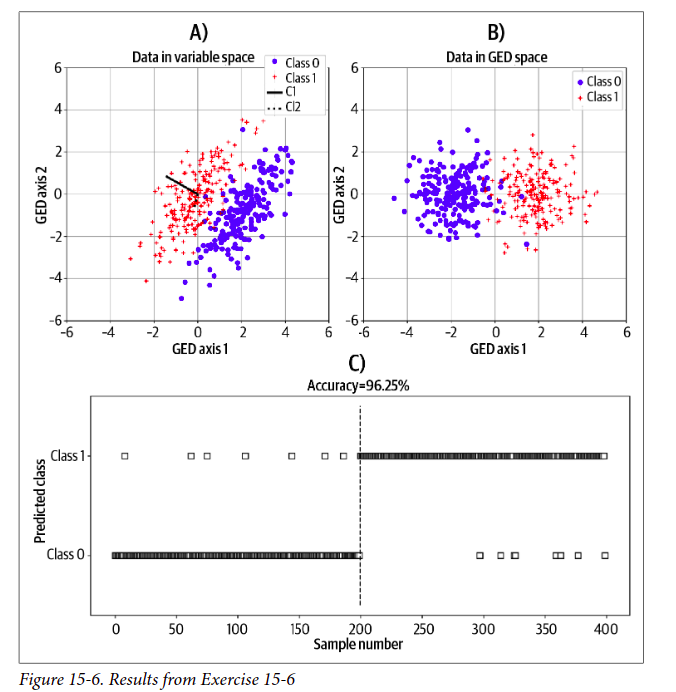

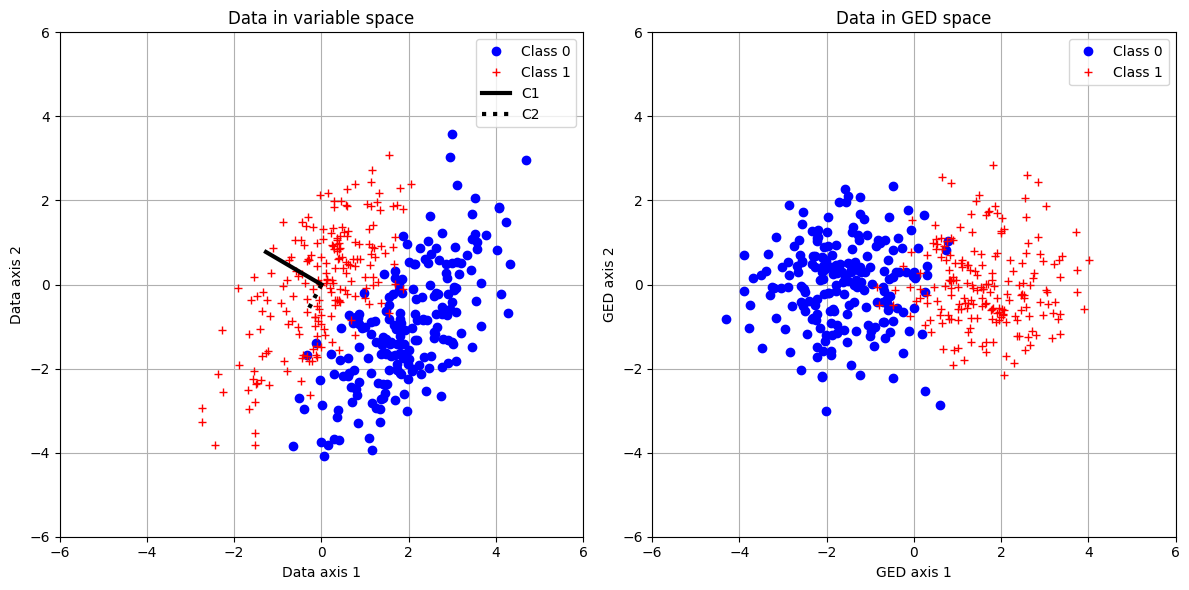

In [18]:
# LDA

# between-class covariance
cmc1 = np.mean(class1,axis=0)
cmc2 = np.mean(class2,axis=0)
covB = np.cov(np.vstack((cmc1,cmc2)).T,ddof=1)

# within-class covariances
cov1 = np.cov(class1.T,ddof=1)
cov2 = np.cov(class2.T,ddof=1)
covW = (cov1+cov2)/2


# LDA via GED
from scipy.linalg import eigh
evals,evecs = eigh(covB,covW)

# sort the solution
sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]


# project the mean-centered data onto the GED axes
projA = (alldata-np.mean(alldata,axis=0)) @ evecs  # A=all
# show the data
_,axs = plt.subplots(1,2,figsize=(12,6))
marker = ['bo','r+']
for i in range(2):
  axs[0].plot(alldata[labels==i,0],alldata[labels==i,1],marker[i],label=f'Class {i}')

axs[0].plot([0,evecs[0,0]],[0,evecs[1,0]],'k-',linewidth=3,label='C1')
axs[0].plot([0,evecs[0,1]],[0,evecs[1,1]],'k:',linewidth=3,label='C2')
axs[0].set_xlabel('Data axis 1')
axs[0].set_ylabel('Data axis 2')
axs[0].set_title('Data in variable space')



# and again in the GED space
for i in range(2):
  axs[1].plot(projA[labels==i,0],projA[labels==i,1],marker[i],label=f'Class {i}')
axs[1].set_xlabel('GED axis 1')
axs[1].set_ylabel('GED axis 2')
axs[1].set_title('Data in GED space')


# common settings
for i in range(2):
  axs[i].axis([-6,6,-6,6])
  axs[i].grid()
  axs[i].legend()

plt.tight_layout()
plt.show()


Prediction accuracy: 94.25%


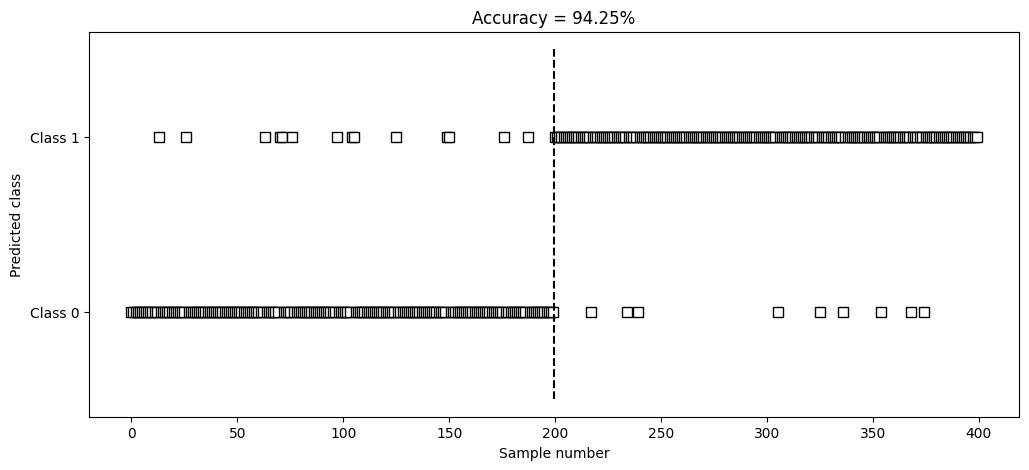

In [19]:
# prediction (converted to ints)
predictedLabel = ( projA[:,0] > 0 )+0

print(f'Prediction accuracy: {100*np.mean( predictedLabel==labels )}%')

# show the results
plt.figure(figsize=(12,5))
plt.plot(predictedLabel,'ks',markersize=7,markerfacecolor='w',linewidth=2)
plt.plot([N-.5,N-.5],[-.5,1.5],'k--')
plt.xlabel('Sample number')
plt.ylabel('Predicted class')
plt.yticks([0,1],labels=['Class 0','Class 1'])
plt.title(f'Accuracy = {100*np.mean(predictedLabel==labels):.2f}%')
plt.show()

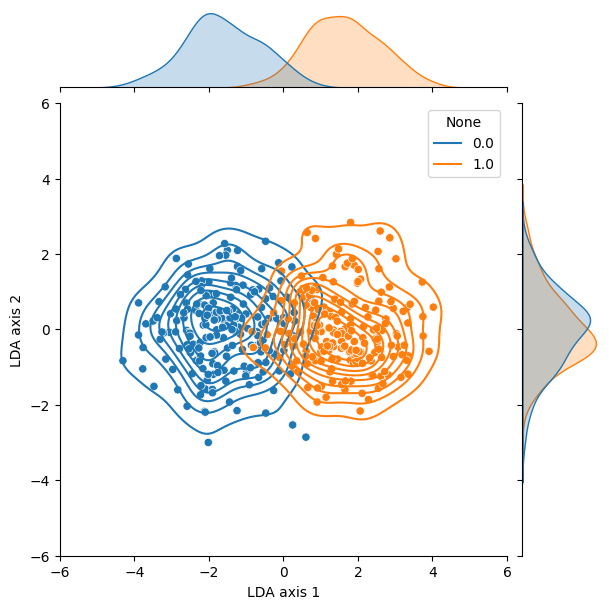

In [20]:
# redraw the jointplot in the GED space (used in Figure 2)
ax = sns.jointplot(x=projA[:,0],y=projA[:,1],hue=labels,xlim=[-6,6],ylim=[-6,6])
ax.ax_joint.set_xlabel('LDA axis 1')
ax.ax_joint.set_ylabel('LDA axis 2')
ax.plot_joint(sns.kdeplot)
plt.show()

### Question 15-7. I  claimed  in  Chapter  13  that  for  a  generalized  eigendecomposition,  the  matrix  of eigenvectors V is not orthogonal, but it is orthogonal in the space of the “denominator” matrix. Your goal here is to demonstrate that empirically.Compute and inspect the results of $V^TV$ and $V^TC_WV$. Ignoring tiny precision errors,which one produces the identity matrix?

In [21]:
# not the identity matrix!
print("V'V:")
print(np.round( evecs.T @ evecs ,3))


# yes the identity matrix!
print(f"\nV'RV:")
print(np.round( evecs.T @ covW @ evecs ,3))

V'V:
[[ 2.215 -0.072]
 [-0.072  0.394]]

V'RV:
[[ 1. -0.]
 [-0.  1.]]


### Question 15-8. Now  to  reproduce  our  results  using  Python’s  sklearn  library.  Use  the  LinearDiscriminantAnalysis  function  in  sklearn.discriminant_analysis.  Produce  a  plot  like Figure  15-7  and  confirm  that  the  overall  prediction  accuracy  matches  results  from your “manual” LDA analysis in the previous exercise. This function allows for several different  solvers;  use  the  eigen  solver  to  match  the  previous  exercise,  and  also  to complete the following exercise.<br>Plot  the  predicted  labels  from  your  “manual”  LDA  on  top;  you  should  find  that  the predicted labels are the same from both approaches.<br>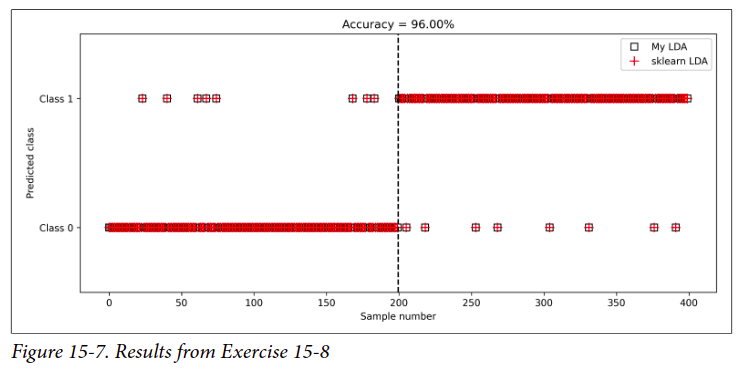

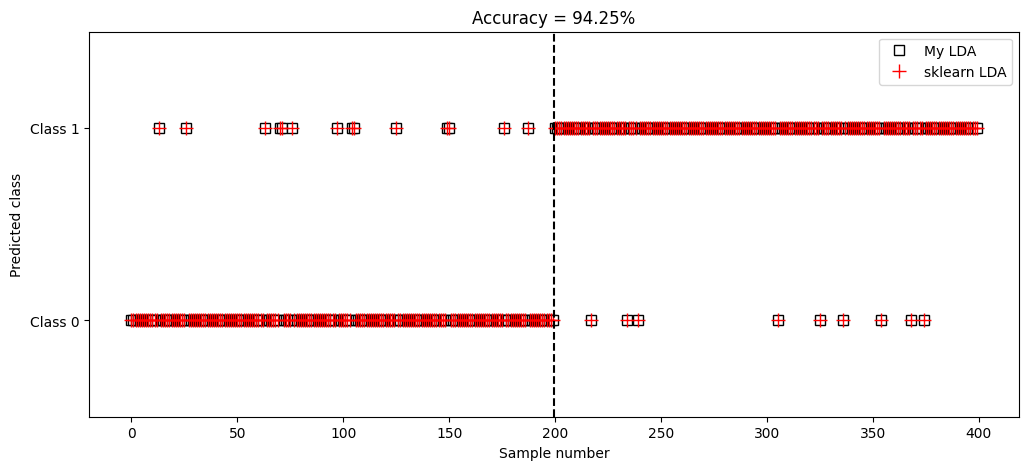

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

ldamodel = LDA(solver='eigen')
ldamodel.fit(alldata,labels)


# show the results
plt.figure(figsize=(12,5))
plt.plot(predictedLabel,'ks',markersize=7,markerfacecolor='w',linewidth=2,label='My LDA')
plt.plot(ldamodel.predict(alldata),'r+',markersize=10,markerfacecolor='w',linewidth=2,label='sklearn LDA')
plt.plot([N-.5,N-.5],[-.5,1.5],'k--')
plt.xlabel('Sample number')
plt.ylabel('Predicted class')
plt.yticks([0,1],labels=['Class 0','Class 1'])
plt.ylim([-.5,1.5])
plt.legend()
plt.title(f'Accuracy = {100*np.mean(ldamodel.predict(alldata)==labels):.2f}%')
plt.show()

### Question 15-9. Let’s use sklearn to explore the effects of shrinkage regularization. As I wrote in Chapters  12  and  13,  it  is  trivial  that  shrinkage  will  reduce  performance  on  training  data; the  important  question  is  whether  the  regularization  improves  prediction  accuracy on  unseen  data  (sometimes  called  a  validation  set  or  test  set).  Therefore,  you  should write  code  to  implement  train/test  splits.  I  did  this  by  randomly  permuting  sample indices between 0 and 399, training on the first 350, and then testing on the final 50.Because this is a small number of samples to average, I repeated this random selection 50  times  and  took  the  average  accuracy  to  be  the  accuracy  per  shrinkage  amount  in Figure 15-8.<br>
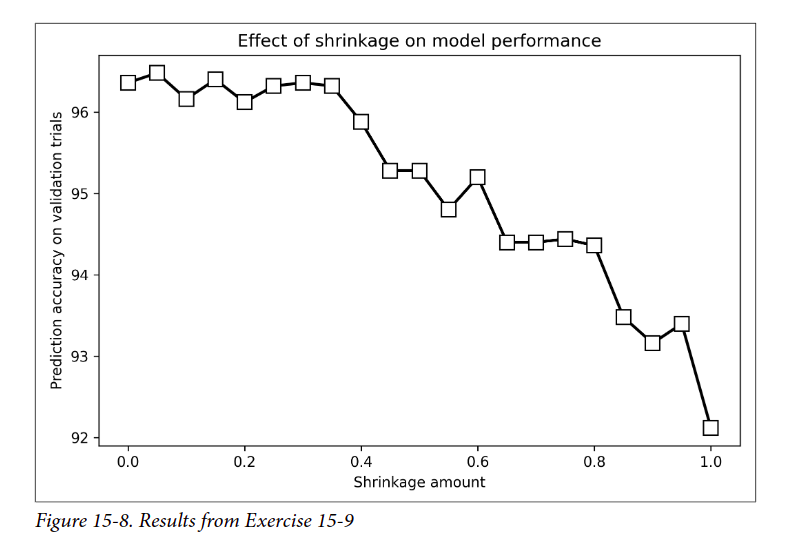<br>

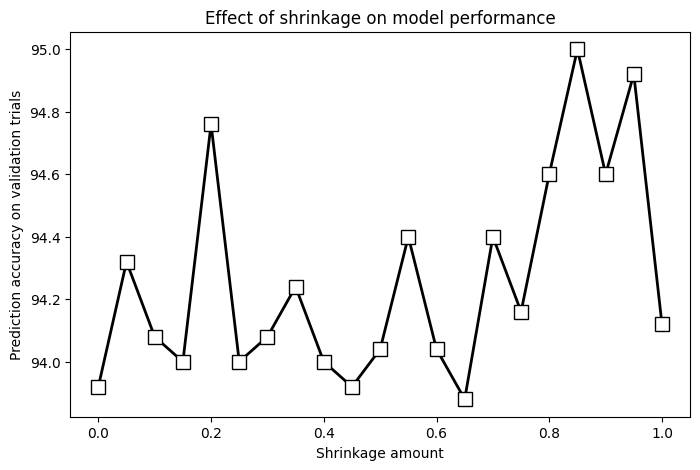

In [23]:
# shrinkage amounts
shrinkage = np.linspace(0,1,21)
accuracies = np.zeros(len(shrinkage))

# loop over shrinkages and compute model accuracy
for i,s in enumerate(shrinkage):
  
  # setup the model
  ldamodel = LDA(solver='eigen',shrinkage=s)

  tmpacc = []
  for _ in range(50):

    # randomly split the data into train/test
    randorder = np.random.permutation(alldata.shape[0])

    # fit the model on the training data
    ldamodel.fit(alldata[randorder[:350],:],labels[randorder[:350]])

    # grab accuracy
    tmpacc.append(100*np.mean(ldamodel.predict(alldata[randorder[350:],:])==labels[randorder[350:]]))

  # evaluate model performance on the test data
  accuracies[i] = np.mean(tmpacc)


# plot!
plt.figure(figsize=(8,5))
plt.plot(shrinkage,accuracies,'ks-',markersize=10,markerfacecolor='w',linewidth=2)
plt.xlabel('Shrinkage amount')
plt.ylabel('Prediction accuracy on validation trials')
plt.title('Effect of shrinkage on model performance')
plt.show()

# Discussion:  
Shrinkage  generally  had  a  negative  impact  on  validation  performance. Although  it  looks  like  the  performance  improved  with  some  shrinkage,  repeating the  code  multiple  times  showed  that  these  were  just  some  random  fluctuations.  A deeper dive into regularization is more appropriate for a dedicated machine learning book,  but  I  wanted  to  highlight  here  that  many  “tricks”  that  have  been  developed  in machine learning are not necessarily advantageous in all cases.

### Question 15-10.Igor  Stravinsky  was  one  of  the  greatest  music  composers  of  all  time  (IMHO)— certainly  one  of  the  most  influential  of  the  20th  century.  He  also  made  many  thought-provoking  statements  on  the  nature  of  art,  media,  and  criticism,  including  one  of my  favorite  quotes:  “The  more  art  is  limited,  the  more  it  is  free.”  There  is  a  famous and captivating drawing of Stravinsky by none other than the great Pablo Picasso. An image  of  this  drawing  is  available  on  [Wikipedia](https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png),  and  we  are  going  to  work  with  this picture in the next several exercises. Like with other images we’ve worked with in this book,  it  is  natively  a  3D  matrix  (640 × 430 × 3),  but  we  will  convert  it  to  grayscale(2D) for convenience.<br>
### The purpose of this exercise is to repeat Exercise 14-5, in which you re-created a close approximation to a smooth-noise image based on four “layers” from the SVD (please look back at that exercise to refresh your memory). Produce a figure like Figure 15-9 using the Stravinsky image. Here is the main question: does reconstructing the image using the first four components give a good result like it did in the previous chapter?<br>
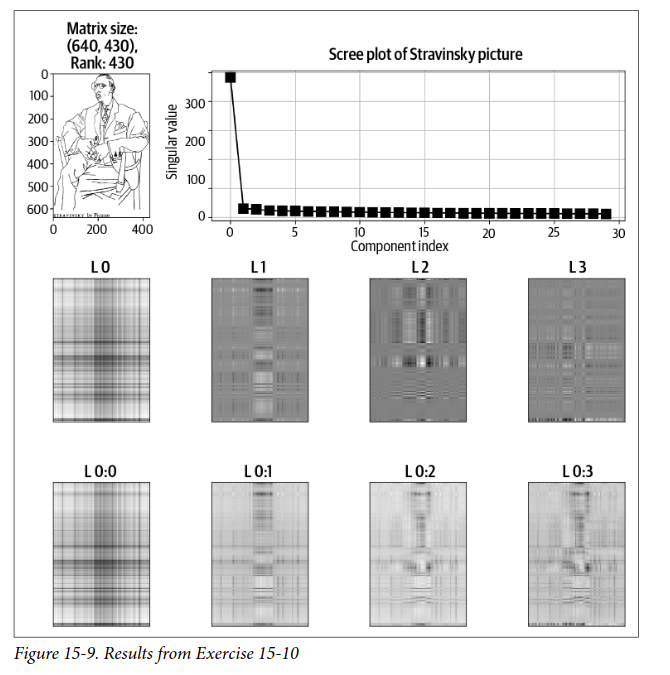

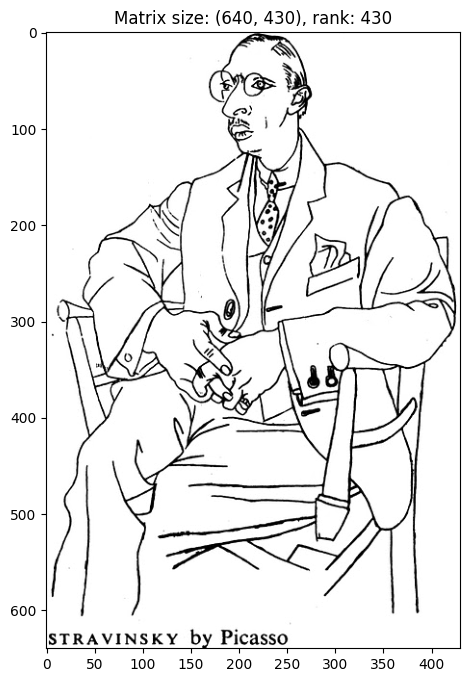

In [24]:
from skimage import io,color
url = 'https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png'

# import picture and downsample to 2D
strav = io.imread(url) / 255
#strav = color.rgb2gray(strav)

plt.figure(figsize=(8,8))
plt.imshow(strav,cmap='gray')
plt.title(f'Matrix size: {strav.shape}, rank: {np.linalg.matrix_rank(strav)}')
plt.show()

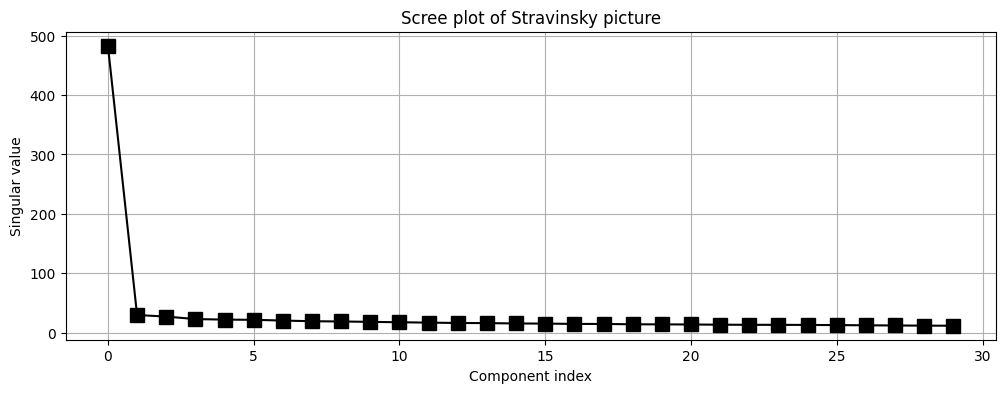

In [25]:
# SVD
U,s,Vt = np.linalg.svd(strav)
S = np.zeros_like(strav)
np.fill_diagonal(S,s)

# show scree plot
plt.figure(figsize=(12,4))
plt.plot(s[:30],'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Singular value')
plt.title('Scree plot of Stravinsky picture')
plt.grid()
plt.show()

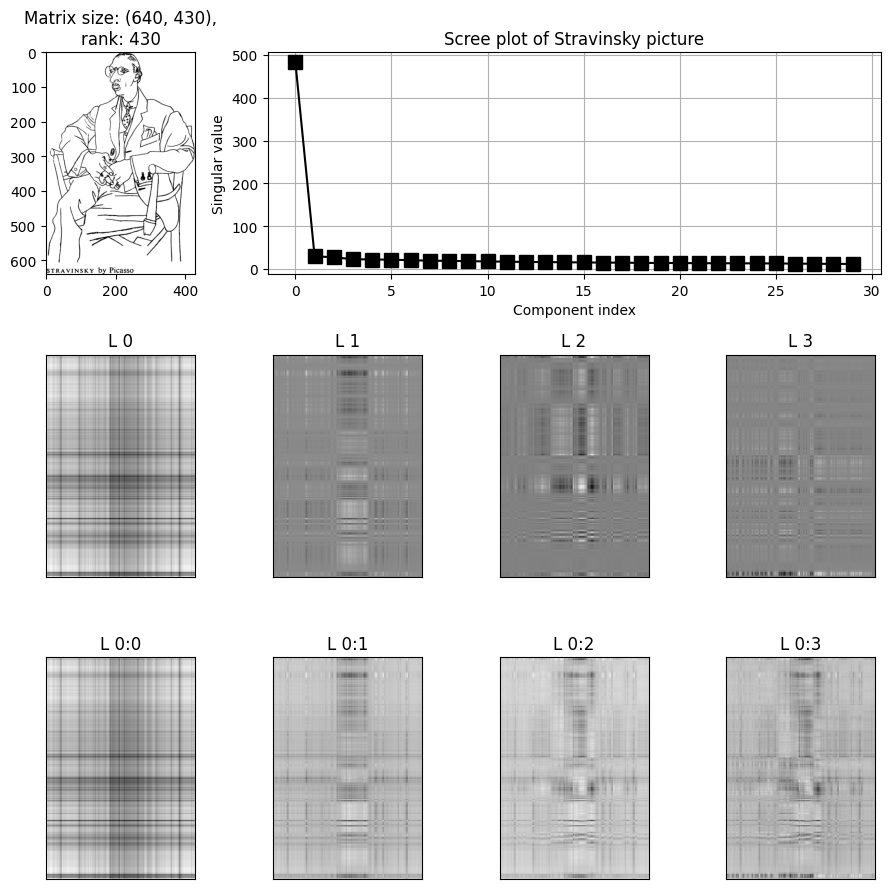

In [26]:
fig = plt.figure(figsize=(9,9))
gs = GridSpec(3,4,figure=fig)

# the image
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(strav,cmap='gray')
ax1.set_title(f'Matrix size: {strav.shape},\nrank: {np.linalg.matrix_rank(strav)}')

# scree plot
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(s[:30],'ks-',markersize=10)
ax2.set_xlabel('Component index')
ax2.set_ylabel('Singular value')
ax2.set_title('Scree plot of Stravinsky picture')
ax2.grid()


## now show the first N "layers" separately
numLayers = 4
rank1mats = np.zeros((numLayers,strav.shape[0],strav.shape[1]))


# the loop
for i in range(numLayers):
    
    # create this layer
    rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*s[i]
    
    # show this layer
    ax = fig.add_subplot(gs[1,i])
    ax.imshow(rank1mats[i,:,:],cmap='gray')
    ax.set_title(f'L {i}')
    ax.set_xticks([]), ax.set_yticks([])

    # show the cumulative sum of layers
    ax = fig.add_subplot(gs[2,i])
    ax.imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray')
    ax.set_title(f'L 0:{i}')
    ax.set_xticks([]), ax.set_yticks([])


plt.tight_layout()
plt.show()
     

### Question 15-11. Well,  the  answer  to  the  question  at  the  end  of  the  previous  exercise  is  a  resounding “No!” The rank-4 approximation is terrible! It looks nothing like the original image. The  goal  of  this  exercise  is  to  reconstruct  the  image  using  more  layers  so  that  the low-rank  approximation  is  reasonably  accurate and  then  compute  the  amount  of compression obtained.<br>Start  by  producing  Figure  15-10,  which  shows  the  original  image,  the  reconstructed image,  and  the  error  map,  which  is  the  squared  difference  between  the  original  and the approximation. For this figure, I chose k = 80 components, but I encourage you toexplore different values (that is, different rank approximations).<br>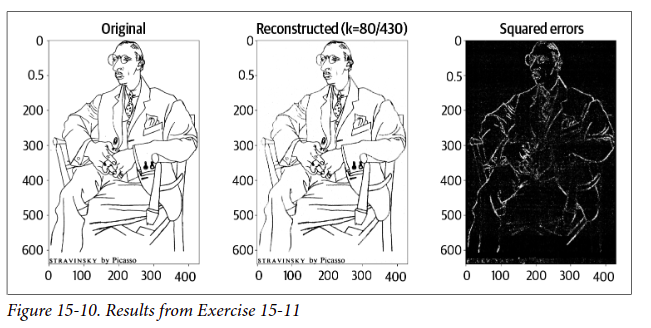<br>Next, compute the compression ratio, which is the percentage of the number of bytes used by the low-rank approximation versus the number of bytes used by the original image.  My  results  for  k  =  80  are  shown  here.Keep  in  mind  that  with  low-rank approximations, you don’t need to store the full image or the full SVD matrices!<br>
#### Original is 2.10 mb
#### Reconstruction is 2.10 mb
#### Recon vectors are 0.65 mb (using k=80 comps.)
#### Compression of 31.13%

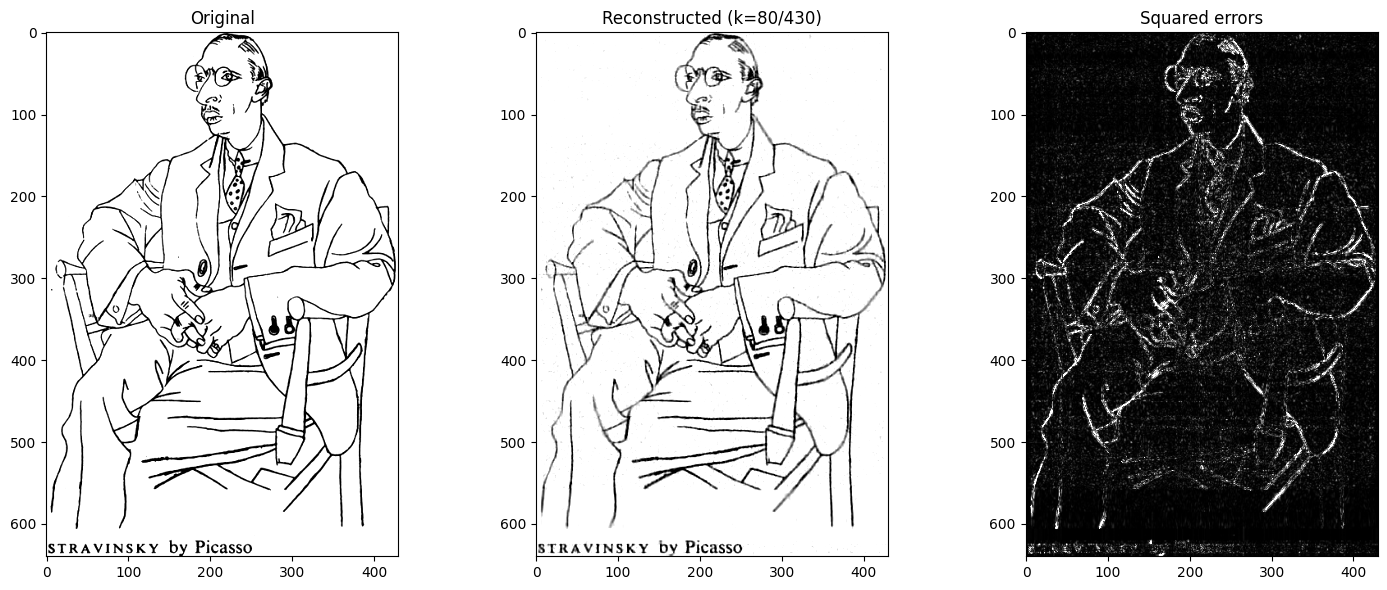

In [27]:
# Reconstruct based on first k layers

# number of components
k = 80

# reconstruction
stravRec = U[:,:k] @ S[:k,:k] @ Vt[:k,:]


# show the original, reconstructed, and error
_,axs = plt.subplots(1,3,figsize=(15,6))

axs[0].imshow(strav,cmap='gray',vmin=.1,vmax=.9)
axs[0].set_title('Original')

axs[1].imshow(stravRec,cmap='gray',vmin=.1,vmax=.9)
axs[1].set_title(f'Reconstructed (k={k}/{len(s)})')

axs[2].imshow((strav-stravRec)**2,cmap='gray',vmin=0,vmax=1e-1)
axs[2].set_title('Squared errors')

plt.tight_layout()
plt.show()

In [28]:
# compute sizes of the images
stravSize  = strav.nbytes / 1024**2
stravRSize = stravRec.nbytes / 1024**2

# and of the vectors/values
uSize = U[:,:k].nbytes / 1024**2
sSize = s[:k].nbytes / 1024**2
vSize = Vt[:k,:].nbytes / 1024**2


# print image sizes
print(f'      Original is {stravSize:.2f} mb')
print(f'Reconstruction is {stravRSize:.2f} mb')
print(f'Recon vectors are {uSize+sSize+vSize:.2f} mb (using k={k} comps.)')

print(f'\nCompression of {100*(uSize+sSize+vSize)/stravSize:.2f}%')

      Original is 2.10 mb
Reconstruction is 2.10 mb
Recon vectors are 0.65 mb (using k=80 comps.)

Compression of 31.13%


### Question 15-12. Why  did  I  choose  k  =  80  and  not,  e.g.,  70  or  103?  It  was  quite  arbitrary,  to  be honest. The goal of this exercise is to see whether it’s possible to use the error map to determine an appropriate rank parameter.In a for loop over reconstruction ranks between 1 and the number of singular values,create the low-rank approximation and compute the Frobenius distance between the original  and  k-rank  approximation.  Then  make  a  plot  of  the  error  as  a  function  of rank, as in Figure 15-11. The error certainly decreases with increasing rank, but there is no clear rank that seems best. Sometimes in optimization algorithms, the derivative of the error function is more informative; give that a try!<br>Final  thought  for  this  exercise:  the  reconstruction  error  for  k  =  430  (i.e.,  the  full SVD)  should  be  exactly  0.  Is  it?  Obviously  the  answer  is  no;  otherwise,  I  wouldn’t have  written  the  question.  But  you  should  confirm  this  yourself.  This  is  yet  another demonstration of precision errors in applied linear algebra.
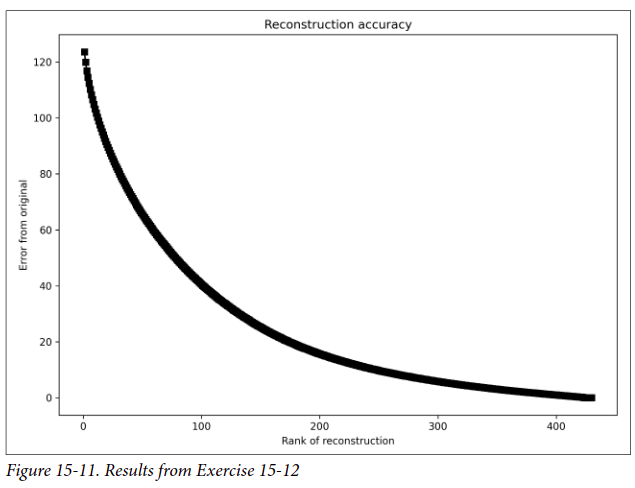

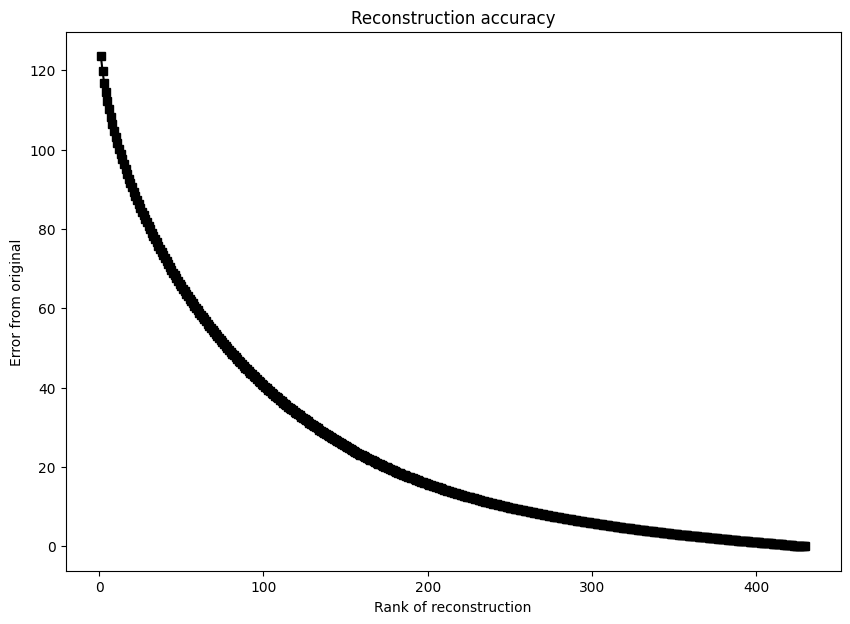

In [29]:
# range of components
k = range(1,len(s)+1)

# initialize variable to store results
kError = np.zeros(len(k))


# the loop
for i in range(len(k)):
  
  # reconstruction
  stravRec = U[:,:k[i]] @ S[:k[i],:k[i]] @ Vt[:k[i],:]

  # compute and store the error
  kError[i] = np.sqrt(np.sum((strav-stravRec)**2))



# show the results
plt.figure(figsize=(10,7))
plt.plot(k,kError,'ks-')
# plt.plot(k[:-1],np.diff(kError),'ks-') # uncomment to show derivative (and comment out the previous line)
plt.xlabel('Rank of reconstruction')
plt.ylabel('Error from original')
plt.title('Reconstruction accuracy')
plt.show()

### Question 5-13. Let’s  see  if  we  can  extend  the  concept  of  low-rank  approximation  to  denoise  the Stravinsky  picture.  The  goal  of  this  exercise  is  to  add  noise  and  inspect  the  SVD results, and then the following exercise will involve “projecting out” the corruption.The noise here will be a spatial sine wave. You can see the noise and corrupted image in Figure 15-12.<br>I will now describe how to create a 2D sine wave (also called a sine grating). This is a good opportunity to practice your math-to-code translation skills. The formula for a 2D sine grating is:$$ Z = \sin(2\pi f(X \cos(\theta) + Y \sin(\theta)))\ $$ <br>In  this  formula,  f  is  the  frequency  of  the  sine  wave,  θ  is  a  rotation  parameter,  and  π is the constant 3.14.. X and Y are grid locations on which the function is evaluated, which I set to be integers from −100 to 100 with the number of steps set to match the size of the Stravinsky picture. I set f = .02 and θ = π/6. <br>Before  moving  on  to  the  rest  of  the  exercise,  I  encourage  you  to  spend  some  time with the sine grating code by exploring the effects of changing the parameters on the resulting image. However, please use the parameters I wrote previously to make sure you can reproduce my results that follow.<br>Next,  corrupt  the  Stravinsky  picture  by  adding  the noise  to  the  image.  You  should first  scale  the  noise  to  a  range  of  0  to  1,  then  add  the  noise  and  the  original  picture together, and then rescale. Scaling an image between 0 and 1 is achieved by applying the following formula:<br> $$\tilde{R} = frac{R - min(R)}{max(R) - min(R)} $$<br>OK, now you have your noise-corrupted image. Reproduce Figure 15-13, which is the same as Figure 15-6 but using the noisy image.<br>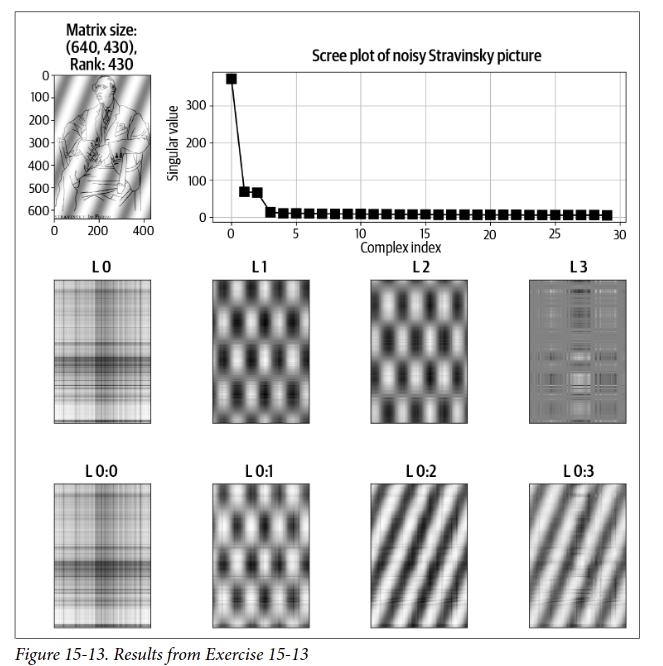

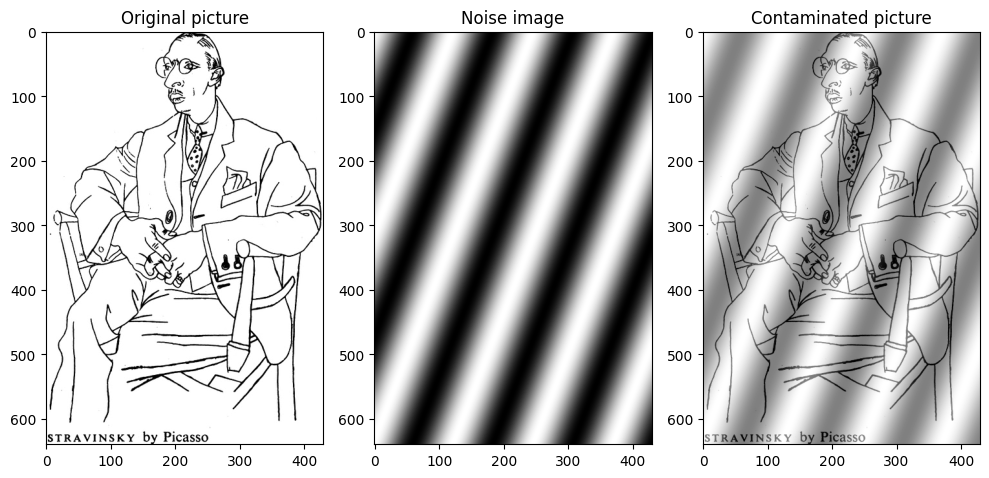

In [30]:
# create a spatial sine wave

# sine phases
sinefreq = .02   # arbitrary units
sinephas = np.pi/6 # rotate

# sine wave initializations
[x,y] = np.meshgrid(np.linspace(-100,100,strav.shape[1]),
                    np.linspace(-100,100,strav.shape[0]))
xp    = x*np.cos(sinephas) + y*np.sin(sinephas)


# compute sine wave
sinimg = np.sin( 2*np.pi*sinefreq*xp)

# scale to [0 1]
sinimg = (sinimg-np.min(sinimg)) / (np.max(sinimg)-np.min(sinimg))


# add to stravinsky picture and re-scale (using two lines)
stravNoise = strav + sinimg
stravNoise = stravNoise-np.min(stravNoise)
stravNoise = stravNoise/np.max(stravNoise)

# let's see it!
_,axs = plt.subplots(1,3,figsize=(10,7))
axs[0].imshow(strav,cmap='gray')
axs[0].set_title('Original picture')

axs[1].imshow(sinimg,cmap='gray')
axs[1].set_title('Noise image')

axs[2].imshow(stravNoise,cmap='gray')
axs[2].set_title('Contaminated picture')

plt.tight_layout()
plt.show()


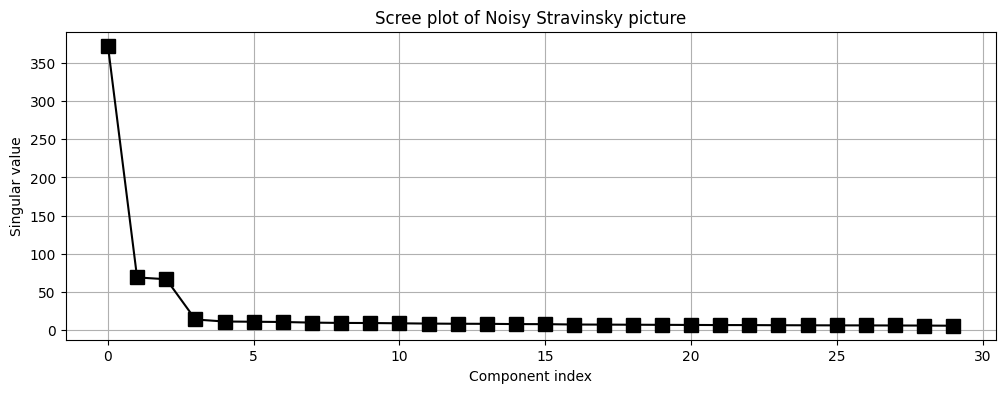

In [31]:
# SVD
Un,sn,Vtn = np.linalg.svd(stravNoise)
Sn = np.zeros_like(stravNoise)
np.fill_diagonal(Sn,sn)

# show scree plot
plt.figure(figsize=(12,4))
plt.plot(sn[:30],'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Singular value')
plt.title('Scree plot of Noisy Stravinsky picture')
plt.grid()
plt.show()

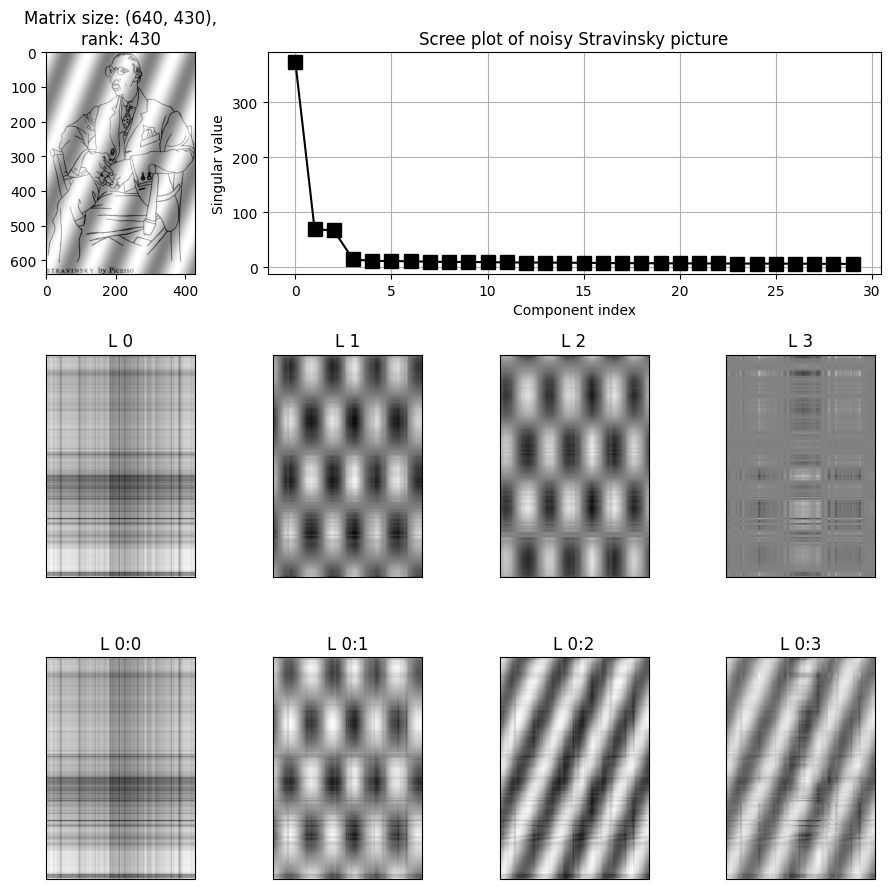

In [32]:
fig = plt.figure(figsize=(9,9))
gs = GridSpec(3,4,figure=fig)

# the image
ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(stravNoise,cmap='gray')
ax1.set_title(f'Matrix size: {strav.shape},\nrank: {np.linalg.matrix_rank(stravNoise)}')

# scree plot
ax2 = fig.add_subplot(gs[0,1:])
ax2.plot(sn[:30],'ks-',markersize=10)
ax2.set_xlabel('Component index')
ax2.set_ylabel('Singular value')
ax2.set_title('Scree plot of noisy Stravinsky picture')
ax2.grid()


## now show the first N "layers" separately
numLayers = 4
rank1mats = np.zeros((numLayers,strav.shape[0],strav.shape[1]))


# the loop
for i in range(numLayers):
    
    # create this layer
    rank1mats[i,:,:] = np.outer(Un[:,i],Vtn[i,:])*sn[i]
    
    # show this layer
    ax = fig.add_subplot(gs[1,i])
    ax.imshow(rank1mats[i,:,:],cmap='gray')
    ax.set_title(f'L {i}')
    ax.set_xticks([]), ax.set_yticks([])

    # show the cumulative sum of layers
    ax = fig.add_subplot(gs[2,i])
    ax.imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray')
    ax.set_title(f'L 0:{i}')
    ax.set_xticks([]), ax.set_yticks([])


plt.tight_layout()
plt.show()
     


# Discussion:  
It’s  interesting  to  compare  Figure  15-13  with  Figure  15-9.  Although  we created  the  noise  based  on  one  feature  (the  sine  wave  grating),  the  SVD  separated the  grating  into  two  components  of  equal  importance  (roughly  equal  singular  values). Those two components are not sine gratings but instead are vertically oriented patches. Their sum, however, produces the diagonal bands of the grating.

### Question 15-14. Now for the denoising. It appears that the noise is contained in the second and third components,  so  your  goal  now  is  to  reconstruct  the  image  using  all  components except for those two. Produce a figure like Figure 15-14.<br>
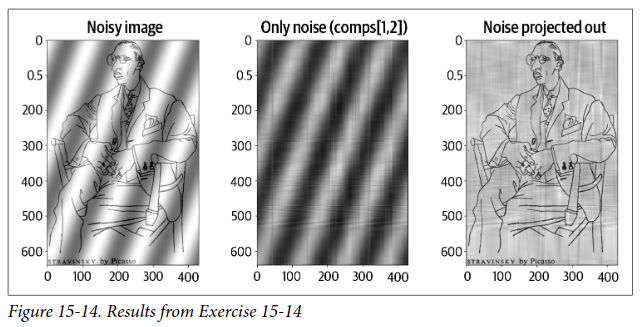

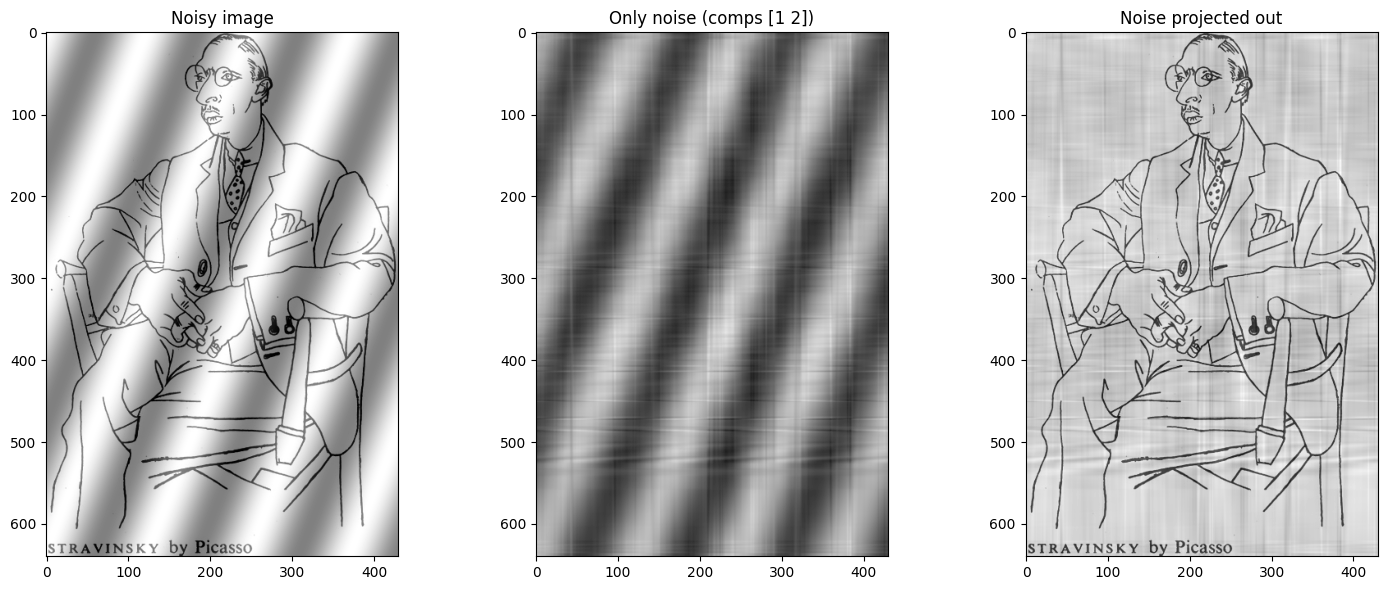

In [33]:
# Reconstruct without specified layers

# noise components
noiseComps = np.array([1,2])

# reconstruction of the noise
stravRecNoise = Un[:,noiseComps] @ Sn[noiseComps,:][:,noiseComps] @ Vtn[noiseComps,:]


# reconstruction of the image with noise projected out
noNoiseCompsU = np.full(Un.shape[0],True)
noNoiseCompsU[noiseComps] = False

noNoiseCompsV = np.full(Vtn.shape[0],True)
noNoiseCompsV[noiseComps] = False

# here's the image without the noise components
stravRecNoNoise = Un[:,noNoiseCompsU] @ Sn[noNoiseCompsU,:][:,noNoiseCompsV] @ Vtn[noNoiseCompsV,:]




# show the original, reconstructed, and error
_,axs = plt.subplots(1,3,figsize=(15,6))

axs[0].imshow(stravNoise,cmap='gray')
axs[0].set_title('Noisy image')

axs[1].imshow(stravRecNoise,cmap='gray',vmin=-.5,vmax=.5)
axs[1].set_title(f'Only noise (comps {noiseComps})')

axs[2].imshow(stravRecNoNoise,cmap='gray',vmin=.1,vmax=.9)
axs[2].set_title('Noise projected out')

plt.tight_layout()
plt.show()
     

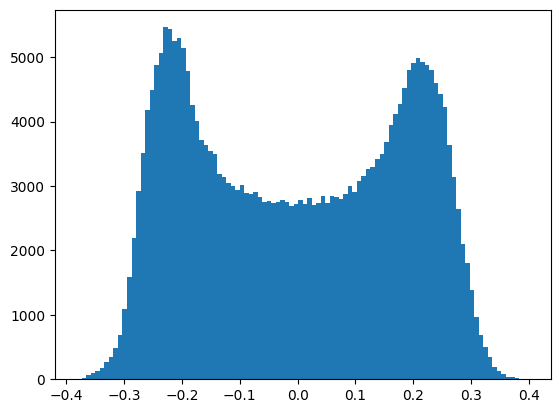

In [34]:
# histogram of noise reconstruction
plt.hist(stravRecNoise.flatten(),100);

# Discussion: 
The denoising is decent but certainly not perfect. One of the reasons for the imperfection is that the noise is not entirely contained in two dimensions (notice that  the  middle  panel  of  Figure  15-14  does  not  perfectly  match  the  noise  image).Furthermore,  the  noise  projection  (the  image  made  from  components  1  and  2)  has negative  values  and  is  distributed  around  zero,  even  though  the  sine  grating  had  no negative  values.  (You  can  confirm  this  by  plotting  a  histogram  of  the  noise  image,which I show in the online code.) The rest of the image needs to have fluctuations invalues to account for this so that the full reconstruction has only positive values.